<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Aplicaciones del Procesamiento de Lenguaje Natural</center></span>

<center>Prática II</center>
<br></br>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Referencias</span>

1. [Aprendizaje Profundo-Diplomado](https://github.com/AprendizajeProfundo/Diplomado)
1. [Aprendizaje Profundo-PLN](https://github.com/AprendizajeProfundo/PLN)
1. Varios, [Dive into deep learning](https://d2l.ai/), enero 2021

## <span style="color:blue">Contenido</span>

- [**Obtención de Datos**](#Obtención-de-Datos)

- [**Pre-procesamiento**](#Pre-procesamiento)

- [**Análisis Descriptivo**](#Análisis-Descriptivo)

- [**Extracción de Variables**](#Extracción-de-Variables)

- [**Aprendizaje No Supervisado**](#Aprendizaje-No-Supervisado)

- [**Aprendizaje Supervisado**](#Aprendizaje-Supervisado)

## <span style="color:blue">Obtención de Datos</span>

El conjunto completo de datos que usaremos para esta práctica son bastantes conocidos y se pueden encontrar aquí:

[The Hewlett Foundation: Automated Essay Scoring](https://www.kaggle.com/c/asap-aes/data)

Por algunos detalles técnicos, fue necesario hacer unos ajustes a los datos, por lo que usaremos los datos depurados a continuación:

In [6]:
# Librería para manejo de datos
import pandas as pd

# Datos de ensayos
datos = pd.read_excel("../Datos/datos/training_set_rel3.xls",usecols=['essay_id', 'essay_set', 'essay','domain1_score'])

# Descripción de los datos
descripcion = pd.read_excel('../Datos/datos/essay_set_descriptions.xls')

**Veamos los datos:**

In [8]:
datos

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
4,5,1,"Dear @LOCATION1, I know having computers has a...",8
...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35
12974,21628,8,I never understood the meaning laughter is th...,32
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40
12976,21630,8,Trippin' on fen...,40


**<center>Veamos una fila en específico</center>**

In [9]:
datos.iloc[[0]]

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8


**<center>Un ensayo en específico, sería</center>**

In [10]:
print(datos.iloc[0]['essay'])

Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy

**Veamos también, una descripción de los datos:**

In [11]:
descripcion

,essay_set,type_of_essay,grade_level,training_set_size,valid_set_size,test_set_size,min_domain1_score,max_domain1_score,min_domain2_score,max_domain2_score,has_domain1rater1,has_domain1rater2,has_domain1rater3,has_domain1_score,has_domain2rater1,has_domain2rater2,has_domain2_score
0,1,persuasive / narrative / expository,8,1783,589,594,2,12,NaN,NaN,1,1,0,1,0,0,0
1,2,persuasive / narrative / expository,10,1800,600,600,1,6,1.0,4.0,1,1,0,1,1,1,1
2,3,source dependent responses,10,1726,568,564,0,3,NaN,NaN,1,1,0,1,0,0,0
3,4,source dependent responses,10,1772,586,590,0,3,NaN,NaN,1,1,0,1,0,0,0
4,5,source dependent responses,8,1805,601,600,0,4,NaN,NaN,1,1,0,1,0,0,0
5,6,source dependent responses,10,1800,600,600,0,4,NaN,NaN,1,1,0,1,0,0,0
6,7,persuasive / narrative / expository,7,1569,441,454,0,30,NaN,NaN,1,1,0,1,0,0,0
7,8,persuasive / narrative / expository,10,723,233,252,0,60,NaN,NaN,1,1,1,1,0,0,0


**<center>¿Qué es un dominio?</center>**

[[Volver]](#Contenido)

## Pre-procesamiento

In [12]:
# !pip install language_tool_python

In [13]:
# Importar librería de chequeo de lenguaje
import language_tool_python
import datetime

In [7]:
tool = language_tool_python.LanguageTool('en-US')

In [8]:
l = tool.check(datos['essay'][0])
c = language_tool_python.utils.correct(datos['essay'][0], l)

for cor in l:
    print(cor)
print("\nCuántos errores:",len(l))
print("\nEnsayo corregido:\n\n",c)

Offset 218, length 6, Rule ID: MORFOLOGIK_RULE_EN_US
Message: Possible spelling mistake found.
Suggestion: trouble; treble
...he globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How wo...
                                           ^^^^^^
Offset 239, length 4, Rule ID: EN_CONTRACTION_SPELLING
Message: Possible spelling mistake found
Suggestion: Don't
...nd keeps us out of troble! Thing about! Dont you think so? How would you feel if you...
                                           ^^^^
Offset 338, length 4, Rule ID: EVERY_EVER
Message: Did you mean “every”?
Suggestion: every
...lways on the phone with friends! Do you ever time to chat with your friends or buisn...
                                           ^^^^
Offset 377, length 8, Rule ID: MORFOLOGIK_RULE_EN_US
Message: Possible spelling mistake found.
Suggestion: business
... ever time to chat with your friends or buisness partner about things. Well now - there'...
                                        

In [9]:
t0 = datetime.datetime.now()

datos['matches'] = datos['essay'].apply(lambda txt: tool.check(txt))
datos['corrections'] = datos.apply(lambda l: len(l['matches']), axis=1)
datos['corrected'] = datos.apply(lambda l: language_tool_python.utils.correct(l['essay'], l['matches']), axis=1)

t1 = datetime.datetime.now()
print('Processing time: {}'.format(t1 - t0))


datos.to_pickle('training_corr.pkl')

Processing time: 0:25:26.771814


In [10]:
datos = pd.read_pickle('training_corr.pkl')

In [11]:
!python -m spacy download 'en_core_web_lg'

2021-09-09 23:02:24.011791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-09 23:02:24.011866: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
     |████████████████████████████████| 777.1 MB 3.4 kB/s eta 0:00:015   |██                              | 47.6 MB 4.8 MB/s eta 0:02:32     |████████▊                       | 210.5 MB 2.8 MB/s eta 0:03:20     |██████████████████████▊         | 550.8 MB 4.2 MB/s eta 0:00:54     |████████████████████████        | 585.2 MB 2.9 MB/s eta 0:01:07     |██████████████████████████████▍ | 737.2 MB 761 kB/s eta 0:00:53
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [12]:
sents = []
tokens = []
lemma = []
pos = []
ner = []

import spacy
import numpy as np
from spacy.lang.en.stop_words import STOP_WORDS

stop_words = set(STOP_WORDS)
# stop_words.update(punctuation) # remove it if you need punctuation 

nlp = spacy.load('en_core_web_lg')

t0 = datetime.datetime.now()

# suppress numpy warnings
np.warnings.filterwarnings('ignore')

for essay in nlp.pipe(datos['corrected'], batch_size=100, n_process=4):
    if essay.is_parsed:
        tokens.append([e.text for e in essay])
        sents.append([sent.text.strip() for sent in essay.sents])
        pos.append([e.pos_ for e in essay])
        ner.append([e.text for e in essay.ents])
        lemma.append([n.lemma_ for n in essay])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)
        sents.append(None)
        ner.append(None)

datos['tokens'] = tokens
datos['lemma'] = lemma
datos['pos'] = pos
datos['sents'] = sents
datos['ner'] = ner

t1 = datetime.datetime.now()
print('Processing time: {}'.format(t1 - t0))

2021-09-09 23:06:24.069687: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-09 23:06:24.069718: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Processing time: 3:39:54.726632


In [13]:
datos.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater3_trait5,rater3_trait6,matches,corrections,corrected,tokens,lemma,pos,sents,ner
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,"[Offset 218, length 6, Rule ID: MORFOLOGIK_RUL...",17,"Dear local newspaper, I think effects computer...","[Dear, local, newspaper, ,, I, think, effects,...","[dear, local, newspaper, ,, I, think, effect, ...","[ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...","[Dear local newspaper, I think effects compute...","[@ORGANIZATION2, @CAPS1, Facebook, MySpace]"
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,"[Offset 148, length 8, Rule ID: MORFOLOGIK_RUL...",25,"Dear @CAPS1 @CAPS2, I believe that using compu...","[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...","[dear, @CAPS1, @caps2, ,, I, believe, that, us...","[ADJ, PUNCT, ADJ, PUNCT, PRON, VERB, SCONJ, VE...","[Dear @CAPS1, @CAPS2, I believe that using com...","[Facebook and MySpace, millions, one, MySpace,..."
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,"[Offset 315, length 4, Rule ID: MORFOLOGIK_RUL...",17,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[INTJ, PUNCT, PUNCT, PROPN, PROPN, ADJ, CCONJ,...","[Dear, @CAPS1 @CAPS2 @CAPS3, More and more peo...","[today, one, one, @CAPS5, @ORGANIZATION1]"
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,"[Offset 86, length 7, Rule ID: MORFOLOGIK_RULE...",30,"Dear Local Newspaper, @CAPS1 I have found that...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[PROPN, PROPN, PROPN, PUNCT, PUNCT, PRON, AUX,...","[Dear Local Newspaper, @CAPS1, I have found th...","[Dear Local Newspaper, @CAPS1, @PERSON1, @PERS..."
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,"[Offset 177, length 8, Rule ID: MORFOLOGIK_RUL...",17,"Dear @LOCATION1, I know having computers has a...","[Dear, @LOCATION1, ,, I, know, having, compute...","[dear, @LOCATION1, ,, I, know, have, computer,...","[INTJ, PROPN, PUNCT, PRON, VERB, VERB, NOUN, V...","[Dear @LOCATION1, I know having computers has ...","[First, one, Secondly, @LOCATION2, one, only o..."


In [14]:
t0 = datetime.datetime.now()

datos['token_count'] = datos.apply(lambda x: len(x['tokens']), axis=1)
datos['unique_token_count'] = datos.apply(lambda x: len(set(x['tokens'])), axis=1)
datos['nostop_count'] = datos.apply(lambda x: len([token for token in x['tokens'] if token not in stop_words]), axis=1)
datos['sent_count'] = datos.apply(lambda x: len(x['sents']), axis=1)
datos['ner_count'] = datos.apply(lambda x: len(x['ner']), axis=1)
datos['comma'] = datos.apply(lambda x: x['corrected'].count(','), axis=1)
datos['question'] = datos.apply(lambda x: x['corrected'].count('?'), axis=1)
datos['exclamation'] = datos.apply(lambda x: x['corrected'].count('!'), axis=1)
datos['quotation'] = datos.apply(lambda x: x['corrected'].count('"') + x['corrected'].count("'"), axis=1)
datos['organization'] = datos.apply(lambda x: x['corrected'].count(r'@ORGANIZATION'), axis=1)
datos['caps'] = datos.apply(lambda x: x['corrected'].count(r'@CAPS'), axis=1)
datos['person'] = datos.apply(lambda x: x['corrected'].count(r'@PERSON'), axis=1)
datos['location'] = datos.apply(lambda x: x['corrected'].count(r'@LOCATION'), axis=1)
datos['money'] = datos.apply(lambda x: x['corrected'].count(r'@MONEY'), axis=1)
datos['time'] = datos.apply(lambda x: x['corrected'].count(r'@TIME'), axis=1)
datos['date'] = datos.apply(lambda x: x['corrected'].count(r'@DATE'), axis=1)
datos['percent'] = datos.apply(lambda x: x['corrected'].count(r'@PERCENT'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['adj'] = datos.apply(lambda x: x['pos'].count('ADJ'), axis=1)
datos['pron'] = datos.apply(lambda x: x['pos'].count('PRON'), axis=1)
datos['verb'] = datos.apply(lambda x: x['pos'].count('VERB'), axis=1)
datos['noun'] = datos.apply(lambda x: x['pos'].count('NOUN'), axis=1)
datos['cconj'] = datos.apply(lambda x: x['pos'].count('CCONJ'), axis=1)
datos['adv'] = datos.apply(lambda x: x['pos'].count('ADV'), axis=1)
datos['det'] = datos.apply(lambda x: x['pos'].count('DET'), axis=1)
datos['propn'] = datos.apply(lambda x: x['pos'].count('PROPN'), axis=1)
datos['num'] = datos.apply(lambda x: x['pos'].count('NUM'), axis=1)
datos['part'] = datos.apply(lambda x: x['pos'].count('PART'), axis=1)
datos['intj'] = datos.apply(lambda x: x['pos'].count('INTJ'), axis=1)

t1 = datetime.datetime.now()
print('Processing time: {}'.format(t1 - t0))
datos.to_pickle('training_features.pkl')

Processing time: 0:00:24.543975


In [15]:
datos

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,18,48,59,14,19,21,5,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,22,44,74,19,27,37,9,4,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,16,22,47,16,14,30,3,3,10,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,38,29,82,17,30,46,36,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,25,34,75,16,40,56,3,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,57,134,145,55,74,70,17,14,23,3
12974,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,35,76,77,27,60,53,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,41,84,126,39,57,96,39,5,21,2
12976,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,43,95,79,22,60,51,13,4,10,1


In [16]:
datos['tokens']

0        [Dear, local, newspaper, ,, I, think, effects,...
1        [Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...
2        [Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...
3        [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...
4        [Dear, @LOCATION1, ,, I, know, having, compute...
                               ...                        
12973    [ , In, most, stories, mothers, and, daughters...
12974    [ , I, never, understood, the, meaning, laught...
12975    [When, you, laugh, ,, is, @CAPS5, out, of, hab...
12976    [ , Tripping, ', on, fences, I, am, @NUM1, yea...
12977    [ , Many, people, believe, that, laughter, can...
Name: tokens, Length: 12978, dtype: object

In [17]:
datos['lemma']

0        [dear, local, newspaper, ,, I, think, effect, ...
1        [dear, @CAPS1, @caps2, ,, I, believe, that, us...
2        [dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...
3        [Dear, Local, Newspaper, ,, @CAPS1, I, have, f...
4        [dear, @LOCATION1, ,, I, know, have, computer,...
                               ...                        
12973    [ , in, most, story, mother, and, daughter, be...
12974    [ , I, never, understand, the, meaning, laught...
12975    [when, you, laugh, ,, be, @CAPS5, out, of, hab...
12976    [ , Tripping, ', on, fence, I, be, @num1, year...
12977    [ , many, people, believe, that, laughter, can...
Name: lemma, Length: 12978, dtype: object

In [18]:
datos['ner']

0              [@ORGANIZATION2, @CAPS1, Facebook, MySpace]
1        [Facebook and MySpace, millions, one, MySpace,...
2                [today, one, one, @CAPS5, @ORGANIZATION1]
3        [Dear Local Newspaper, @CAPS1, @PERSON1, @PERS...
4        [First, one, Secondly, @LOCATION2, one, only o...
                               ...                        
12973    [one, sixteen, forty, Approximately seven mont...
12974    [two, this day, about an hour, a half an hour,...
12975    [@CAPS1, @CAPS1, one, two, @LOCATION2, @PERSON...
12976    [years, two, @ORGANIZATION2, @ORGANIZATION1, @...
12977    [daily, @ORGANIZATION1, @CAPS1, @CAPS1, @ORGAN...
Name: ner, Length: 12978, dtype: object

In [88]:
datos = pd.read_pickle('training_features.pkl')

In [89]:
print(datos.columns.values)

['essay_id' 'essay_set' 'essay' 'rater1_domain1' 'rater2_domain1'
 'rater3_domain1' 'domain1_score' 'rater1_domain2' 'rater2_domain2'
 'domain2_score' 'rater1_trait1' 'rater1_trait2' 'rater1_trait3'
 'rater1_trait4' 'rater1_trait5' 'rater1_trait6' 'rater2_trait1'
 'rater2_trait2' 'rater2_trait3' 'rater2_trait4' 'rater2_trait5'
 'rater2_trait6' 'rater3_trait1' 'rater3_trait2' 'rater3_trait3'
 'rater3_trait4' 'rater3_trait5' 'rater3_trait6' 'matches' 'corrections'
 'corrected' 'tokens' 'lemma' 'pos' 'sents' 'ner' 'token_count'
 'unique_token_count' 'nostop_count' 'sent_count' 'ner_count' 'comma'
 'question' 'exclamation' 'quotation' 'organization' 'caps' 'person'
 'location' 'money' 'time' 'date' 'percent' 'noun' 'adj' 'pron' 'verb'
 'cconj' 'adv' 'det' 'propn' 'num' 'part' 'intj']


In [90]:
datos=datos.drop(columns=['rater1_domain1','rater2_domain1','rater3_domain1','rater1_domain2','rater2_domain2','domain2_score','rater1_trait1','rater1_trait2','rater1_trait3','rater1_trait4','rater1_trait5','rater1_trait6','rater2_trait1','rater2_trait2','rater2_trait3','rater2_trait4','rater2_trait5','rater2_trait6','rater3_trait1','rater3_trait2','rater3_trait3','rater3_trait4','rater3_trait5','rater3_trait6'])

In [91]:
datos

,essay_id,essay_set,essay,domain1_score,matches,corrections,corrected,tokens,lemma,pos,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",8,"[Offset 218, length 6, Rule ID: MORFOLOGIK_RUL...",17,"Dear local newspaper, I think effects computer...","[Dear, local, newspaper, ,, I, think, effects,...","[dear, local, newspaper, ,, I, think, effect, ...","[ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...",...,18,48,59,14,19,21,5,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,"[Offset 148, length 8, Rule ID: MORFOLOGIK_RUL...",25,"Dear @CAPS1 @CAPS2, I believe that using compu...","[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...","[dear, @CAPS1, @caps2, ,, I, believe, that, us...","[ADJ, PUNCT, ADJ, PUNCT, PRON, VERB, SCONJ, VE...",...,22,44,74,19,27,37,9,4,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,"[Offset 315, length 4, Rule ID: MORFOLOGIK_RUL...",17,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[INTJ, PUNCT, PUNCT, PROPN, PROPN, ADJ, CCONJ,...",...,16,22,47,16,14,30,3,3,10,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,"[Offset 86, length 7, Rule ID: MORFOLOGIK_RULE...",30,"Dear Local Newspaper, @CAPS1 I have found that...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[PROPN, PROPN, PROPN, PUNCT, PUNCT, PRON, AUX,...",...,38,29,82,17,30,46,36,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,"[Offset 177, length 8, Rule ID: MORFOLOGIK_RUL...",17,"Dear @LOCATION1, I know having computers has a...","[Dear, @LOCATION1, ,, I, know, having, compute...","[dear, @LOCATION1, ,, I, know, have, computer,...","[INTJ, PROPN, PUNCT, PRON, VERB, VERB, NOUN, V...",...,25,34,75,16,40,56,3,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35,"[Offset 205, length 4, Rule ID: COMMA_COMPOUND...",20,In most stories mothers and daughters are eit...,"[ , In, most, stories, mothers, and, daughters...","[ , in, most, story, mother, and, daughter, be...","[SPACE, ADP, ADJ, NOUN, NOUN, CCONJ, NOUN, AUX...",...,57,134,145,55,74,70,17,14,23,3
12974,21628,8,I never understood the meaning laughter is th...,32,"[Offset 207, length 1, Rule ID: I_LOWERCASE\nM...",36,I never understood the meaning laughter is th...,"[ , I, never, understood, the, meaning, laught...","[ , I, never, understand, the, meaning, laught...","[SPACE, PRON, ADV, VERB, DET, NOUN, NOUN, AUX,...",...,35,76,77,27,60,53,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,"[Offset 331, length 7, Rule ID: ENGLISH_WRONG_...",13,"When you laugh, is @CAPS5 out of habit, or is ...","[When, you, laugh, ,, is, @CAPS5, out, of, hab...","[when, you, laugh, ,, be, @CAPS5, out, of, hab...","[ADV, PRON, VERB, PUNCT, AUX, PROPN, SCONJ, AD...",...,41,84,126,39,57,96,39,5,21,2
12976,21630,8,Trippin' on fen...,40,"[Offset 0, length 31, Rule ID: WHITESPACE_RULE...",5,"Tripping' on fences I am @NUM1 years young, a...","[ , Tripping, ', on, fences, I, am, @NUM1, yea...","[ , Tripping, ', on, fence, I, be, @num1, year...","[SPACE, PROPN, PUNCT, ADP, NOUN, PRON, VERB, A...",...,43,95,79,22,60,51,13,4,10,1


In [86]:
predictors = [  'corrections',
                'unique_token_count',
                'sent_count',
                'ner_count',
                'comma',
                'question',
                'exclamation',
                'quotation',
                'organization',
                'caps',
                'person',
                'location',
                'money',
                'time',
                'date',
                'percent',
                'noun',
                'adj',
                'pron',
                'verb',
                'cconj',
                'adv',
                'det',
                'propn',
                'num',
                'part',
                'intj'
                ]

[[Volver]](#Contenido)

## Análisis Descriptivo

In [7]:
from sklearn.feature_selection import SelectKBest, chi2

X=datos[predictors]
y=datos['domain1_score']
best_features= SelectKBest(score_func=chi2,k=10)
fit=best_features.fit(X,y)

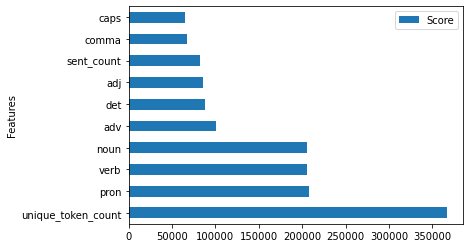

In [8]:
import matplotlib.pyplot as plt

df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(10,'Score').plot(kind='barh')
plt.show()

In [17]:
data_train = pd.read_pickle('../Datos/datos/data_training_scores.pkl')
data_train

,essay_id,topic,essay,rater1_domain1,rater2_domain1,rater3_domain1,target_score,standard_score,uniform_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,0.59980,0.545847
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,0.69960,0.701880
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,0.50000,0.395747
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,0.79940,0.857836
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,0.59980,0.545847
...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,0.50000,0.395747
12974,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,0.44012,0.282093
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,0.59980,0.545847
12976,21630,8,Trippin' on fen...,20,20,NaN,40,0.59980,0.545847


[[Volver]](#Contenido)

## Extracción de Variables 

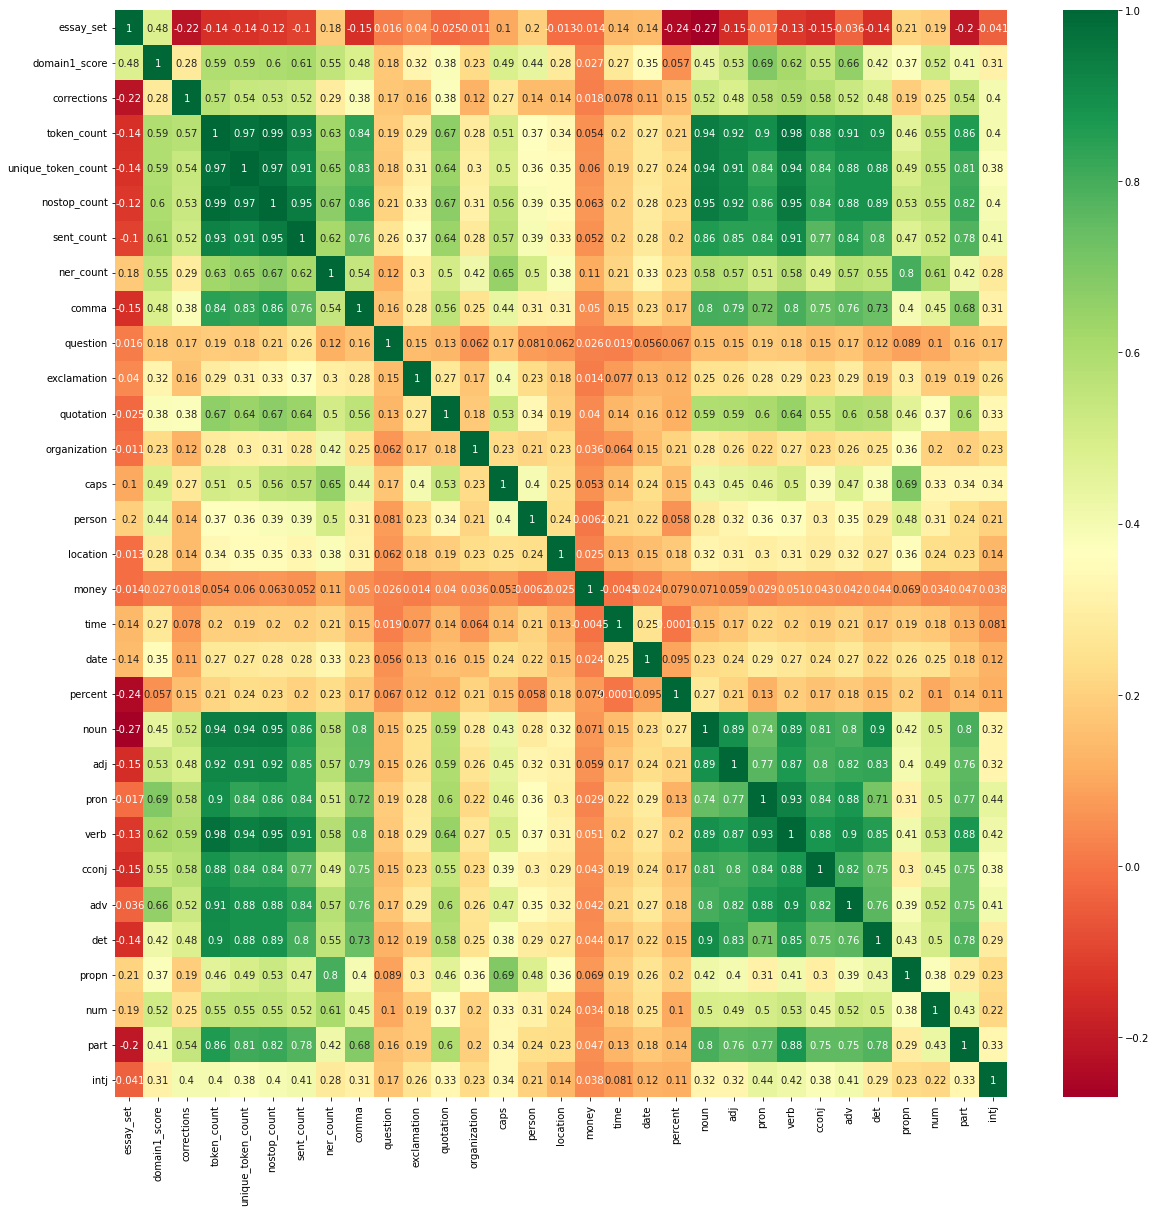

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = datos.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(datos[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [89]:
from sklearn.feature_selection import SelectKBest, f_regression

X=datos[predictors]
y2=data_train['standard_score'].iloc[datos.index]
best_features= SelectKBest(score_func=f_regression,k=10)
fit=best_features.fit(X,y2)

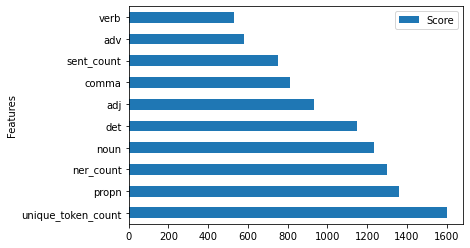

In [90]:
import matplotlib.pyplot as plt

df_score=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,df_score],axis=1)
featureScores.columns=['Features','Score']
featureScores=featureScores.set_index('Features')
featureScores.nlargest(10,'Score').plot(kind='barh')
plt.show()

In [12]:
datos['corrected'].to_csv('../Datos/datos/ensayos.csv')

[[Volver]](#Contenido)

## Aprendizaje No Supervisado 

In [13]:
# fasttext para generar Embeddings
import fasttext

In [14]:

ft_model = fasttext.train_unsupervised('../Datos/datos/ensayos.csv',dim=300)

Read 2M words
Number of words:  15729
Number of labels: 0
Progress: 100.0% words/sec/thread:   29763 lr:  0.000000 avg.loss:  2.043699 ETA:   0h 0m 0s  1.7% words/sec/thread:   28843 lr:  0.049131 avg.loss:  2.465446 ETA:   0h 2m44s100.0% words/sec/thread:   29763 lr: -0.000002 avg.loss:  2.043699 ETA:   0h 0m 0s


##  Embedding de Palabras

In [16]:
import numpy as np

In [17]:
no_doc = np.random.randint(len(datos))

In [18]:
# Volcabulario del embedding
vocabulary = set(ft_model.words)

def doc_word_vectors(words, model, vocabulary, num_features):
    
    nwords = 0.
    no_found=[]
    doc=[]
    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            doc.append(model.get_word_vector(word))
        else:
            no_found.append(word)
    
    
        
    return np.array(doc),no_found

emb0,no_found = doc_word_vectors(datos['tokens'].iloc[no_doc], model=ft_model, vocabulary=vocabulary, num_features=ft_model.dim)

print('Dimensión del Embedding:',emb0.shape)
print('\nPalabras no encontradas:\n\n',no_found)

Dimensión del Embedding: (180, 300)

Palabras no encontradas:

 ['dentist!!!@CAPS2', 'drill', "'s", 'ca', "n't", 'Furthermore', 'dentists', '-', 'Furthermore']


## Embedding de Palabras Para todos los Documentos

**PENDIENTE**

## Embedding de Textos

### Promediar Palabras para Perfilar Ensayos 

In [19]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.get_word_vector(word))
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.words)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
ftext_feature_array = averaged_word_vectorizer(corpus=datos['tokens'], model=ft_model, num_features=ft_model.dim)

In [20]:
doc_embedding = pd.DataFrame(ftext_feature_array)
doc_embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.029524,0.068655,0.000249,-0.097751,-0.037130,0.057932,-0.116209,0.061387,0.052635,-0.072179,...,0.093053,0.012333,-0.005823,0.061814,-0.012759,0.042803,-0.091981,0.078195,-0.080591,-0.062175
1,0.039430,0.080388,0.023087,-0.105649,-0.035737,0.065397,-0.149655,0.075428,0.056503,-0.074461,...,0.081121,-0.004953,0.008622,0.044552,-0.033564,0.021520,-0.065408,0.075078,-0.068822,-0.078410
2,0.071970,0.069918,0.013745,-0.109767,-0.057253,0.078476,-0.139722,0.085458,0.055806,-0.059675,...,0.088740,0.026005,0.010294,0.039900,-0.016498,0.046128,-0.080463,0.052716,-0.039645,-0.084610
3,0.035647,0.055134,0.051999,-0.084739,-0.041799,0.078990,-0.141911,0.098403,0.054825,-0.081138,...,0.089100,0.016769,0.022996,0.034043,-0.031064,-0.000976,-0.076791,0.054451,-0.049709,-0.071923
4,0.039999,0.054744,0.024116,-0.086313,-0.002585,0.079944,-0.125102,0.076796,0.063242,-0.059970,...,0.082465,0.006304,0.003954,0.025946,-0.024821,0.019414,-0.064707,0.046346,-0.035929,-0.081049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.062970,0.057613,0.112138,-0.045188,0.023847,0.107637,-0.154265,0.076950,0.012616,-0.020234,...,0.095555,0.016172,0.022679,0.065530,-0.044849,0.053008,-0.073496,0.055410,-0.086671,-0.068961
12974,0.047462,0.063935,0.098811,-0.054049,0.015265,0.087104,-0.151375,0.081889,0.001231,-0.056922,...,0.096872,0.024802,0.007380,0.051291,-0.050236,0.068661,-0.068170,0.052029,-0.092487,-0.067514
12975,0.053645,0.047557,0.100440,-0.013745,0.000371,0.098446,-0.129408,0.078697,0.043373,-0.033256,...,0.089530,0.012295,0.019978,0.038944,-0.055741,0.034553,-0.064892,0.057261,-0.079641,-0.040012
12976,0.048604,0.060428,0.051131,-0.023492,0.002788,0.121542,-0.172360,0.086395,0.034307,-0.013687,...,0.093276,-0.002608,0.001692,0.072259,-0.058342,0.045487,-0.063453,0.075512,-0.107319,-0.028214


In [54]:
doc_embedding.to_csv('Doc_Embedding_300.csv')

In [36]:
doc_embedding = pd.read_csv('Doc_Embedding_300.csv',index_col=0)
doc_embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.029524,0.068655,0.000249,-0.097751,-0.037130,0.057932,-0.116209,0.061387,0.052635,-0.072179,...,0.093053,0.012333,-0.005823,0.061814,-0.012759,0.042803,-0.091981,0.078195,-0.080591,-0.062175
1,0.039430,0.080388,0.023087,-0.105649,-0.035737,0.065397,-0.149655,0.075428,0.056503,-0.074461,...,0.081121,-0.004953,0.008622,0.044552,-0.033564,0.021520,-0.065408,0.075078,-0.068822,-0.078410
2,0.071970,0.069918,0.013745,-0.109767,-0.057253,0.078476,-0.139722,0.085458,0.055806,-0.059675,...,0.088740,0.026005,0.010294,0.039900,-0.016498,0.046128,-0.080463,0.052716,-0.039645,-0.084610
3,0.035647,0.055134,0.051999,-0.084739,-0.041799,0.078990,-0.141911,0.098403,0.054825,-0.081138,...,0.089100,0.016769,0.022996,0.034043,-0.031064,-0.000976,-0.076791,0.054451,-0.049709,-0.071923
4,0.039999,0.054744,0.024116,-0.086313,-0.002585,0.079944,-0.125102,0.076796,0.063242,-0.059970,...,0.082465,0.006304,0.003954,0.025946,-0.024821,0.019414,-0.064707,0.046346,-0.035929,-0.081049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.062970,0.057613,0.112138,-0.045188,0.023847,0.107637,-0.154265,0.076950,0.012616,-0.020234,...,0.095555,0.016172,0.022679,0.065530,-0.044849,0.053008,-0.073496,0.055410,-0.086671,-0.068961
12974,0.047462,0.063935,0.098811,-0.054049,0.015265,0.087104,-0.151375,0.081889,0.001231,-0.056922,...,0.096872,0.024802,0.007380,0.051291,-0.050236,0.068661,-0.068170,0.052029,-0.092487,-0.067514
12975,0.053645,0.047557,0.100440,-0.013745,0.000371,0.098446,-0.129408,0.078697,0.043373,-0.033256,...,0.089530,0.012295,0.019978,0.038944,-0.055741,0.034553,-0.064892,0.057261,-0.079641,-0.040012
12976,0.048604,0.060428,0.051131,-0.023492,0.002788,0.121542,-0.172360,0.086395,0.034307,-0.013687,...,0.093276,-0.002608,0.001692,0.072259,-0.058342,0.045487,-0.063453,0.075512,-0.107319,-0.028214


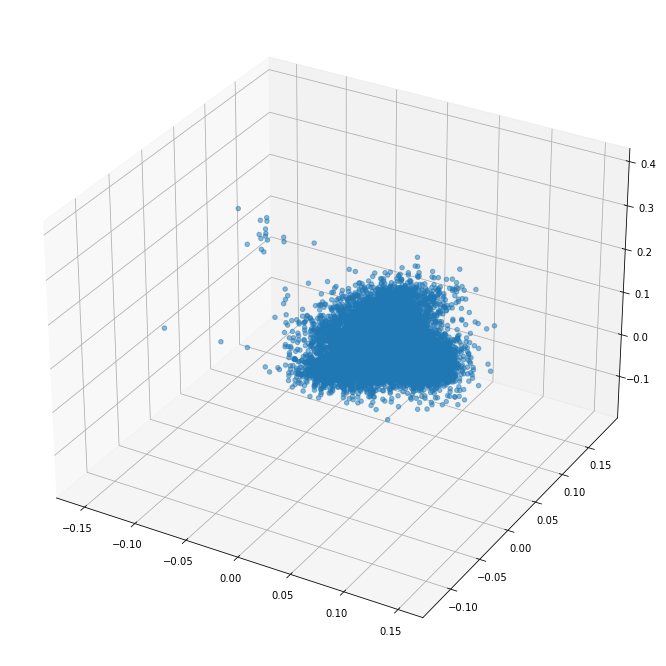

In [37]:
%matplotlib inline
#%matplotlib qt
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(doc_embedding.iloc[:,0],doc_embedding.iloc[:,1],doc_embedding.iloc[:,2],alpha=0.5)
plt.show()

## Reducción de Dimensión

### PCA 

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=40, random_state=0)
pcs = pca.fit_transform(doc_embedding.values)

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.24321326 0.41325153 0.5173836  0.59821903 0.65915863 0.69873135
 0.73091507 0.74614895 0.75884125 0.76984964 0.78009799 0.78935184
 0.79726714 0.8046978  0.81155672 0.81777381 0.82331763 0.82854628
 0.83365173 0.83858004 0.84301682 0.84732716 0.85147849 0.85549945
 0.8593484  0.86304281 0.86647416 0.86973883 0.8728383  0.87590591
 0.8788509  0.8817364  0.88452397 0.88716384 0.88967164 0.89209487
 0.89439284 0.89664445 0.89882303 0.90088407]


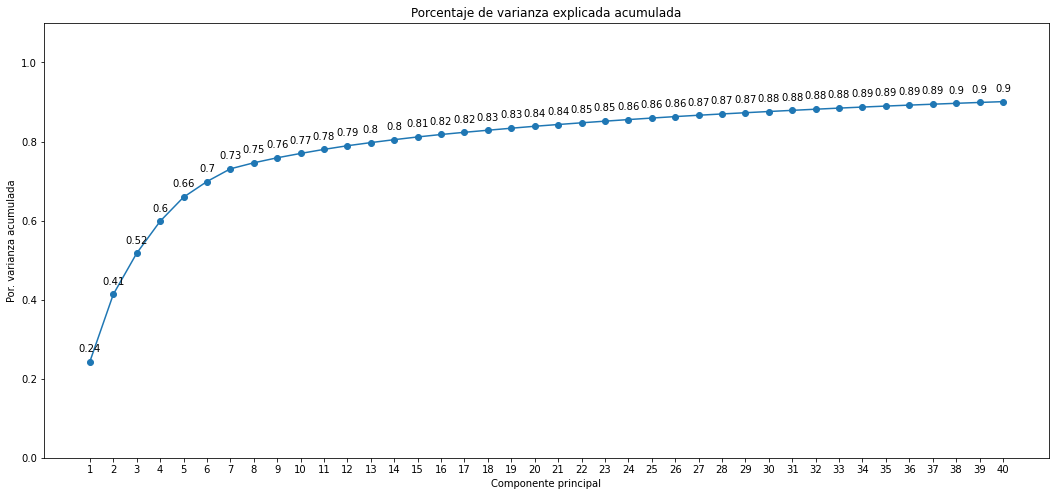

In [39]:
%matplotlib inline

# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 8))
ax.plot(
    np.arange(pca.n_components_) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

#ax.axvline(x=11, linestyle = '--')
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

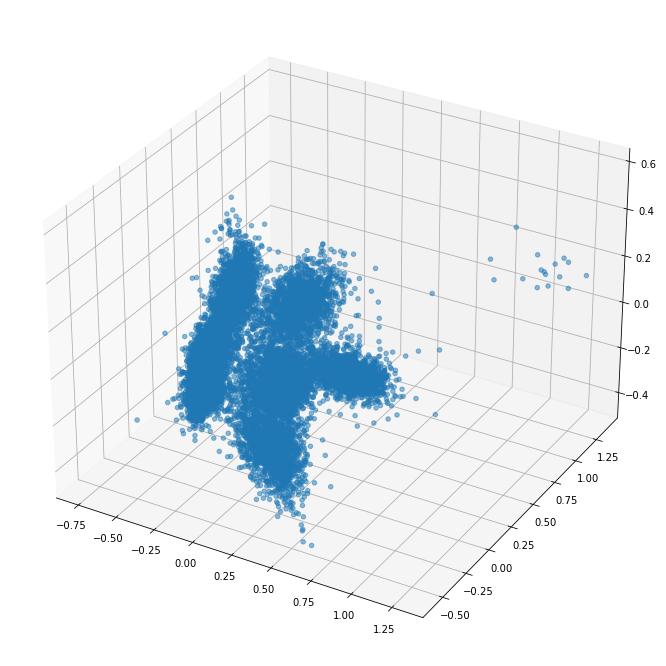

In [ ]:
%matplotlib inline
#%matplotlib qt
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(pcs[:,0],pcs[:,1],pcs[:,2],alpha=0.5)
plt.show()

## Clustering

### K-Means 

In [42]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_pcs = scaler.fit_transform(pcs)

In [34]:
n_max = 80

kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

sse = []

for k in range(1, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    sse.append(kmeans.inertia_)

### Elbow 

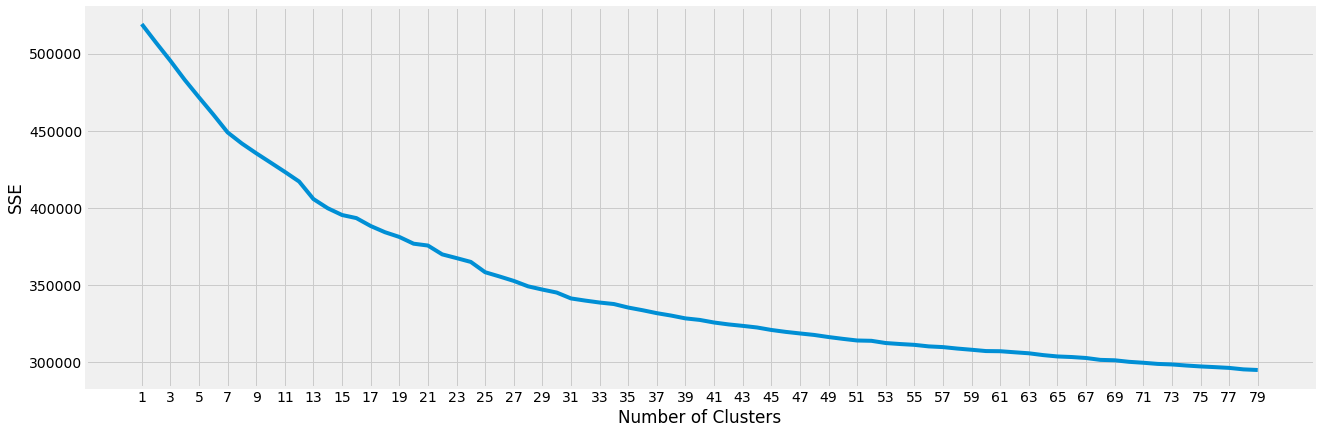

In [35]:
%matplotlib inline
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(1, n_max), sse)
plt.xticks(range(1, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

### Número Optimo de Clusters 

In [36]:
kl = KneeLocator(range(1, n_max), sse, curve="convex", direction="decreasing")

kl.elbow

31

### Silhouette Coefficients

In [37]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, n_max):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_pcs)
    score = silhouette_score(scaled_pcs, kmeans.labels_)
    silhouette_coefficients.append(score)

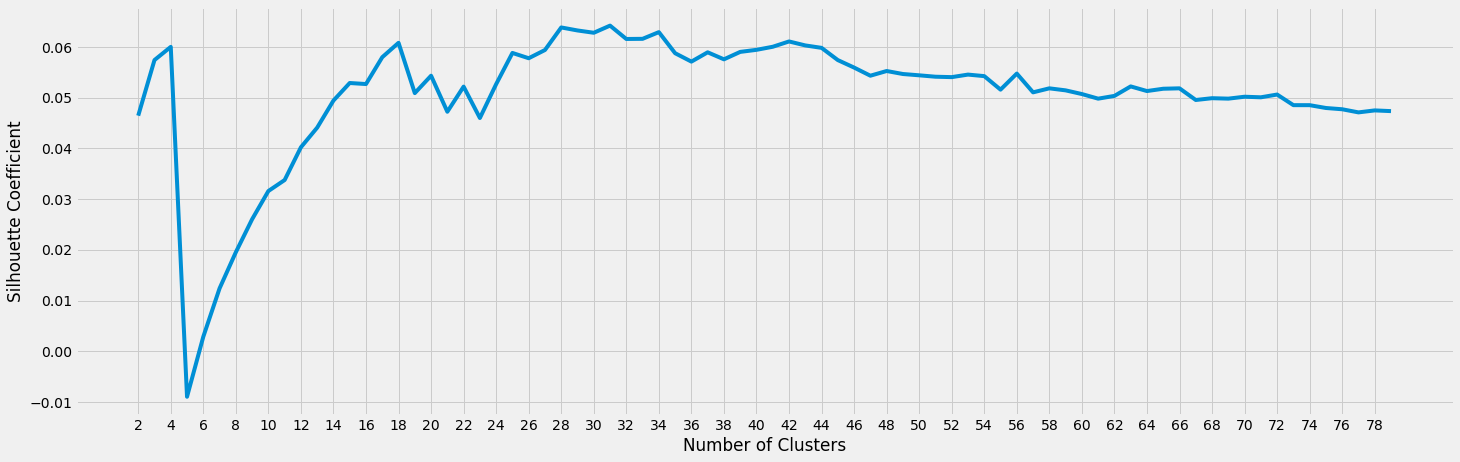

In [38]:
plt.figure(figsize=(22, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(2, n_max), silhouette_coefficients)
plt.xticks(range(2, n_max,2))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [53]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=9, random_state=0)
km.fit_transform(scaled_pcs)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['Grupo'])

In [54]:
data_final = pd.DataFrame([datos['essay'].values, ftext_feature_array,pcs,cluster_labels['Grupo']]).T
data_final.columns = ['essay','Embedding_300','PCA_40','Grupo']
data_final

,essay,Embedding_300,PCA_40,Grupo
0,"Dear local newspaper, I think effects computer...","[0.0295240741722193, 0.0686550713107768, 0.000...","[-0.3652411498228895, 0.0059020478556142545, -...",7
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","[0.0394296800937461, 0.0803876249044263, 0.023...","[-0.3349730504404363, 0.02694684532587877, -0....",7
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[0.0719695743072802, 0.0699181315154854, 0.013...","[-0.33814322312176537, 0.026676232124773325, -...",7
3,"Dear Local Newspaper, @CAPS1 I have found that...","[0.0356469482496335, 0.0551342354551131, 0.051...","[-0.31963211015821164, 0.04940567193931952, -0...",7
4,"Dear @LOCATION1, I know having computers has a...","[0.0399990115611972, 0.0547439935368673, 0.024...","[-0.3185485131183755, -0.006231793956220515, -...",7
...,...,...,...,...
12973,In most stories mothers and daughters are eit...,"[0.0629703543205074, 0.0576134067068328, 0.112...","[-0.18791681599631094, -0.06025016389992152, 0...",3
12974,I never understood the meaning laughter is th...,"[0.0474616437147785, 0.0639348637391885, 0.098...","[-0.2001099219924499, -0.024213326143479482, 0...",3
12975,"When you laugh, is @CAPS5 out of habit, or is ...","[0.0536450611946197, 0.0475574552676411, 0.100...","[-0.1623757925513437, 0.06542237098554636, 0.1...",3
12976,Trippin' on fen...,"[0.0486037977905425, 0.0604278634004003, 0.051...","[-0.16572868847620972, 0.016386070813859493, 0...",3


In [55]:
data_final.to_csv('essay_embedding_300_PCA_40_grupo.csv')

In [56]:
data_final.groupby('Grupo')[['Grupo']].describe().T

Grupo            0     1     2     3     4     5     6     7    8
Grupo count   1790  1684  1791  1201  1748  1167  1014  1813  770
      unique     1     1     1     1     1     1     1     1    1
      top        0     1     2     3     4     5     6     7    8
      freq    1790  1684  1791  1201  1748  1167  1014  1813  770

In [50]:
datos

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12974,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12976,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


## Resultado de Clustering

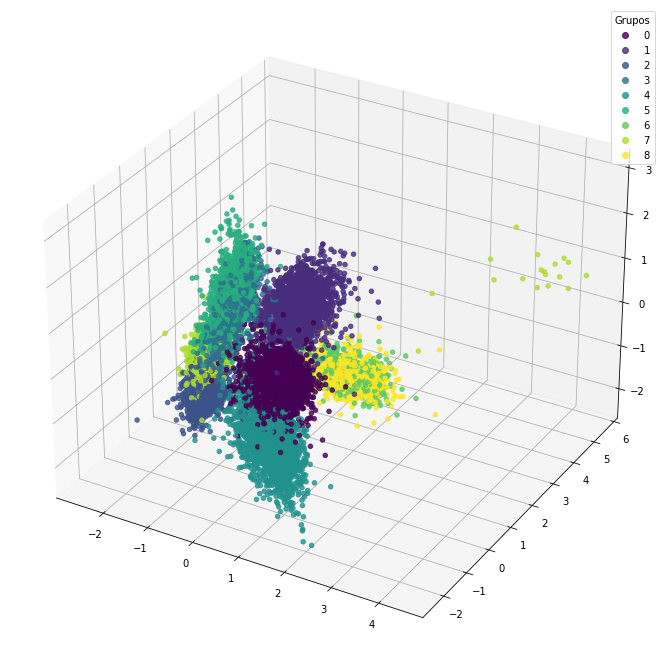

In [78]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## Visualización por T-SNE

In [58]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3).fit_transform(scaled_pcs)
X_embedded.shape

(12978, 3)

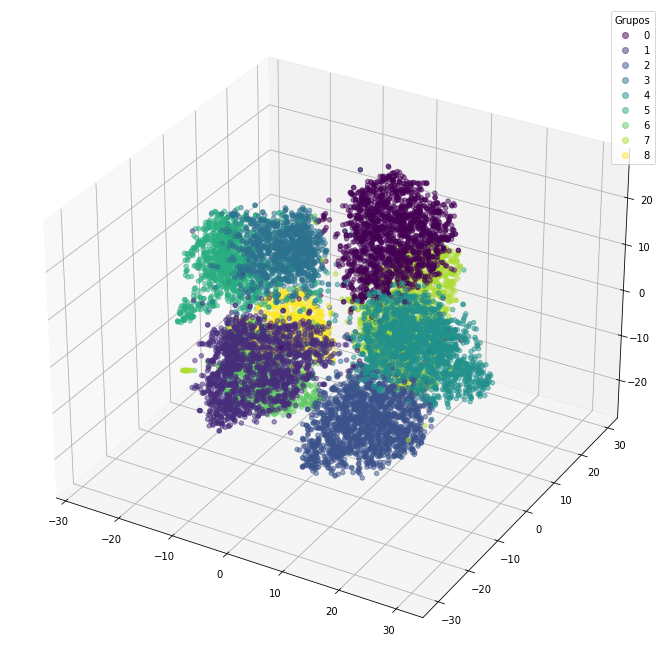

In [66]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],alpha=0.5,c=cluster_labels)
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

In [61]:
data_final = pd.DataFrame([datos['essay'].values, datos['corrected'].values,ftext_feature_array,pcs,X_embedded,cluster_labels['Grupo']]).T
data_final.columns = ['essay','corrected','Embedding_300','PCA_40','TSNE_3','Grupo']
data_final

,essay,corrected,Embedding_300,PCA_40,TSNE_3,Grupo
0,"Dear local newspaper, I think effects computer...","Dear local newspaper, I think effects computer...","[0.0295240741722193, 0.0686550713107768, 0.000...","[-0.3652411498228895, 0.0059020478556142545, -...","[3.452922, 14.09987, -2.1513095]",7
1,"Dear @CAPS1 @CAPS2, I believe that using compu...","Dear @CAPS1 @CAPS2, I believe that using compu...","[0.0394296800937461, 0.0803876249044263, 0.023...","[-0.3349730504404363, 0.02694684532587877, -0....","[-0.013135172, 16.675117, -11.130215]",7
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[0.0719695743072802, 0.0699181315154854, 0.013...","[-0.33814322312176537, 0.026676232124773325, -...","[4.8740635, 25.186968, -5.3799744]",7
3,"Dear Local Newspaper, @CAPS1 I have found that...","Dear Local Newspaper, @CAPS1 I have found that...","[0.0356469482496335, 0.0551342354551131, 0.051...","[-0.31963211015821164, 0.04940567193931952, -0...","[-1.7401366, 18.707659, -14.744502]",7
4,"Dear @LOCATION1, I know having computers has a...","Dear @LOCATION1, I know having computers has a...","[0.0399990115611972, 0.0547439935368673, 0.024...","[-0.3185485131183755, -0.006231793956220515, -...","[3.8301988, 15.191276, -12.973166]",7
...,...,...,...,...,...,...
12973,In most stories mothers and daughters are eit...,In most stories mothers and daughters are eit...,"[0.0629703543205074, 0.0576134067068328, 0.112...","[-0.18791681599631094, -0.06025016389992152, 0...","[-5.3823657, -1.5951165, 18.53066]",3
12974,I never understood the meaning laughter is th...,I never understood the meaning laughter is th...,"[0.0474616437147785, 0.0639348637391885, 0.098...","[-0.2001099219924499, -0.024213326143479482, 0...","[-4.6492243, -2.2744493, 19.172071]",3
12975,"When you laugh, is @CAPS5 out of habit, or is ...","When you laugh, is @CAPS5 out of habit, or is ...","[0.0536450611946197, 0.0475574552676411, 0.100...","[-0.1623757925513437, 0.06542237098554636, 0.1...","[-7.916717, -0.1390782, 17.360756]",3
12976,Trippin' on fen...,"Tripping' on fences I am @NUM1 years young, a...","[0.0486037977905425, 0.0604278634004003, 0.051...","[-0.16572868847620972, 0.016386070813859493, 0...","[-4.9053097, -8.226818, 14.885445]",3


In [62]:
data_final.to_csv('essay_corrected_embedding_300_PCA_40_TSNE.csv')

In [14]:
data_final = pd.read_csv('essay_corrected_embedding_300_PCA_40_grupo.csv',index_col=0)

## Ejemplos de Clusters 

In [5]:
cluster = 0

ensayos = data_final[data_final['Grupo']==cluster]
ensayos

,essay,corrected,Embedding_300,PCA_40,TSNE_3,Grupo
1783,Certain materials being removed from libraries...,Certain materials being removed from libraries...,[ 8.95216940e-02 5.92817169e-02 8.04425017e-...,[-0.30598587 -0.08221176 -0.1393592 -0.126721...,[ 9.331747 6.5805964 -2.739645 ],0
1784,Write a persuasive essay to a newspaper reflec...,Write a persuasive essay to a newspaper reflec...,[ 3.89144775e-02 7.96284946e-02 -4.29549010e-...,[-0.43724501 -0.05042781 -0.14831774 0.010515...,[ 7.1607585 18.846262 0.9184058],0
1785,Do you think that libraries should remove cert...,Do you think that libraries should remove cert...,[ 0.05038937 0.05829172 0.00526158 -0.095681...,[-4.44300628e-01 1.06324571e-03 -1.60529298e-...,[-0.0672878 16.904844 2.857986 ],0
1786,"In @DATE1's world, there are many things found...","In @DATE1's world, there are many things found...",[ 7.14081658e-02 4.22674749e-02 3.28732145e-...,[-0.38271559 -0.02175564 -0.27802689 -0.102799...,[ 6.794983 16.526472 -0.69145644],0
1787,In life you have the 'offensive things'. The l...,"In life, you have the 'offensive things'. The ...",[ 0.04375537 0.06662852 -0.00047685 -0.086184...,[-0.36491925 0.01979739 -0.13108308 0.016524...,[5.7302547 6.3191667 5.827498 ],0
...,...,...,...,...,...,...
6009,I would have to say that the reason that the n...,I would have to say that the reason that the n...,[ 2.54344928e-02 7.34067000e-02 -1.18267442e-...,[-0.17151537 -0.18653827 -0.19943798 -0.033181...,[ 2.5250888 15.561867 6.846436 ],0
6313,Reserved need to check keenly,Reserved need to check keenly,[ 9.20403302e-02 1.19383624e-01 -3.75319694e-...,[-0.74772093 -0.12751152 -0.35986221 0.041613...,[-16.588829 2.6877868 -16.178596 ],0
6444,NO IMAGE,NO IMAGE,[-1.55899823e-01 -7.44088180e-03 4.31449823e-...,[ 0.33836122 0.69496975 -0.16056964 -0.043191...,[ 3.8920472 -12.260648 -21.483559 ],0
6572,The author ended the story with an unconcluded...,The author ended the story with an concluded e...,[ 0.04081171 0.04356724 0.06118793 -0.147971...,[-0.02170889 -0.19056144 -0.11463533 -0.086345...,[-2.1444387 14.351213 15.855663 ],0


In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-es")

In [21]:
cluster = 2

ensayos = data_final[data_final['Grupo']==cluster]

for i in range(3):
    ensayo = ensayos.corrected.sample().values
    print(''.join(ensayo))
    print()
    traduccion = translator(''.join(ensayo))
    print(traduccion[0]['translation_text'])    
    print()

By ending the story with the idea of retaking a test in the spring, the author sets a feeling of starting fresh and persevering. For example, when the author says” when the snow melts and the geese return and the hibiscus is budding, ” she shows the idea of starting a fresh new life in the spring by returning to their home and the hibiscus is starting fresh by budding again. This is why spring is when sang wants to start fresh and retake the test. The paragraph also shows that sang, like the hibiscus, is persevering. The hibiscus is persevering by making it through the winter and blooming again while sang is persevering by retaking the test. The author ends with this paragraph to show that sang is not going to give up. 

Al terminar la historia con la idea de volver a hacer una prueba en primavera, la autora se siente fresca y perseverante. Por ejemplo, cuando el autor dice "cuando la nieve se derrite y los gansos regresan y el hibisco está en ciernes", muestra la idea de comenzar una 

## Tópicos Originales

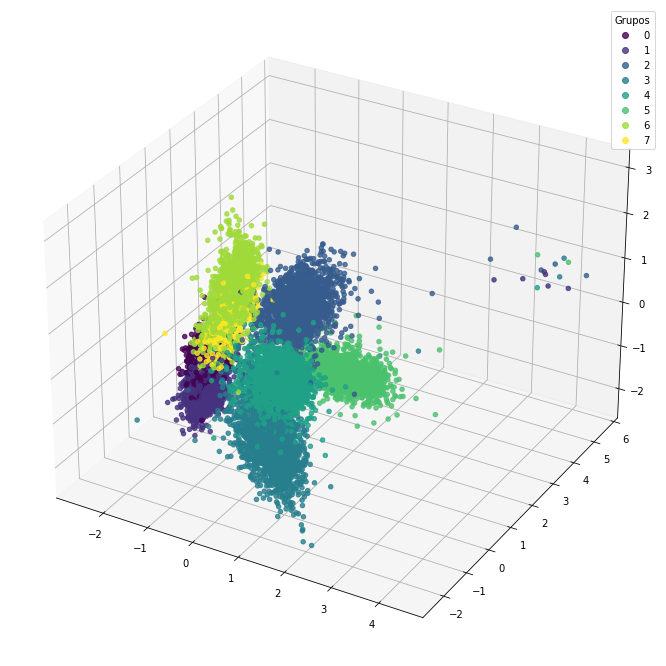

In [69]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=datos['essay_set'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## Visualización por T-SNE (Tópicos Originales)

In [76]:
from sklearn.manifold import TSNE
X_embedded_2 = TSNE(n_components=3).fit_transform(scaled_pcs)
X_embedded_2.shape

(12978, 3)

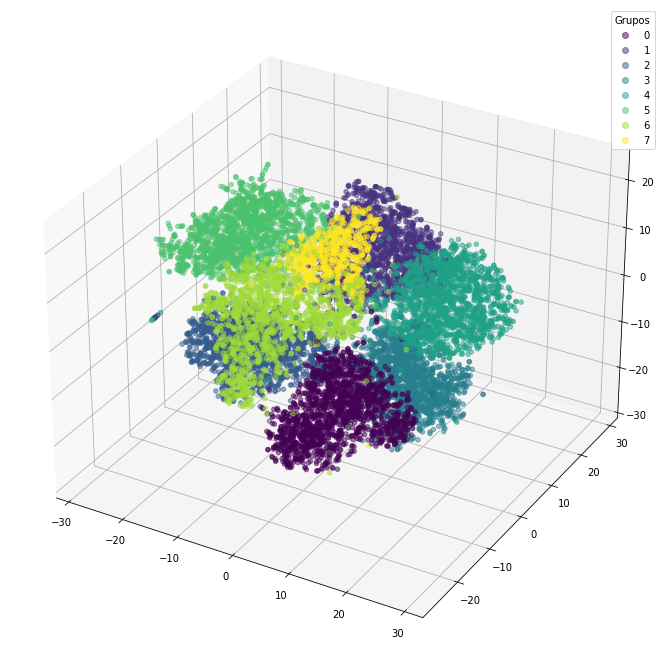

In [77]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(X_embedded_2[:,0],X_embedded_2[:,1],X_embedded_2[:,2],alpha=0.5,c=datos['essay_set'])
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

## Tópicos Originales vs clustering

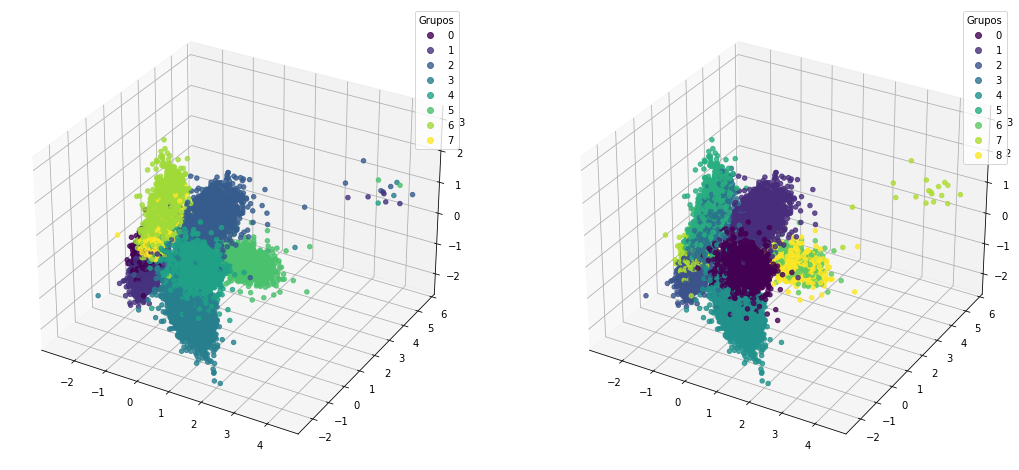

In [74]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=datos['essay_set'])
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter3D(scaled_pcs[:,0],scaled_pcs[:,1],scaled_pcs[:,2],alpha=0.8,c=cluster_labels)
labels = sorted(cluster_labels['Grupo'].unique())
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

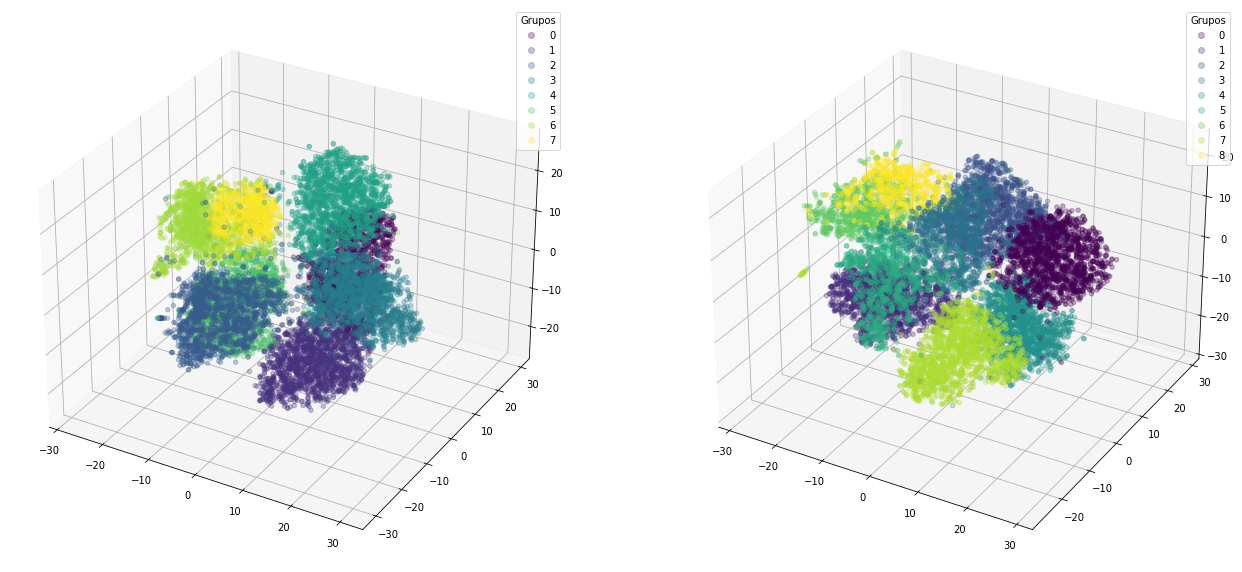

In [84]:
%matplotlib inline
#%matplotlib qt

fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(121, projection='3d')
scatter = ax.scatter3D(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],alpha=0.3,c=datos['essay_set'])
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")

ax = fig.add_subplot(122, projection='3d')
scatter = ax.scatter3D(X_embedded_2[:,0],X_embedded_2[:,1],X_embedded_2[:,2],alpha=0.3,c=cluster_labels)
plt.legend(labels = labels, handles=scatter.legend_elements()[0], title="Grupos")
plt.show()

[[Volver]](#Contenido)

## Aprendizaje Supervisado

In [25]:
# Motor de Inteligencia Artificial
import tensorflow as tf
# Manejo de arreglos
import numpy as np
# Chequear Versión de tensorflow
print("tensorflow version:",tf.__version__)

tensorflow version: 2.5.0


In [53]:
embedding = pd.read_csv('Doc_Embedding_300.csv',index_col=0)
embedding_vector_length = embedding.shape[1]
embedding

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.029524,0.068655,0.000249,-0.097751,-0.037130,0.057932,-0.116209,0.061387,0.052635,-0.072179,...,0.093053,0.012333,-0.005823,0.061814,-0.012759,0.042803,-0.091981,0.078195,-0.080591,-0.062175
1,0.039430,0.080388,0.023087,-0.105649,-0.035737,0.065397,-0.149655,0.075428,0.056503,-0.074461,...,0.081121,-0.004953,0.008622,0.044552,-0.033564,0.021520,-0.065408,0.075078,-0.068822,-0.078410
2,0.071970,0.069918,0.013745,-0.109767,-0.057253,0.078476,-0.139722,0.085458,0.055806,-0.059675,...,0.088740,0.026005,0.010294,0.039900,-0.016498,0.046128,-0.080463,0.052716,-0.039645,-0.084610
3,0.035647,0.055134,0.051999,-0.084739,-0.041799,0.078990,-0.141911,0.098403,0.054825,-0.081138,...,0.089100,0.016769,0.022996,0.034043,-0.031064,-0.000976,-0.076791,0.054451,-0.049709,-0.071923
4,0.039999,0.054744,0.024116,-0.086313,-0.002585,0.079944,-0.125102,0.076796,0.063242,-0.059970,...,0.082465,0.006304,0.003954,0.025946,-0.024821,0.019414,-0.064707,0.046346,-0.035929,-0.081049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.062970,0.057613,0.112138,-0.045188,0.023847,0.107637,-0.154265,0.076950,0.012616,-0.020234,...,0.095555,0.016172,0.022679,0.065530,-0.044849,0.053008,-0.073496,0.055410,-0.086671,-0.068961
12974,0.047462,0.063935,0.098811,-0.054049,0.015265,0.087104,-0.151375,0.081889,0.001231,-0.056922,...,0.096872,0.024802,0.007380,0.051291,-0.050236,0.068661,-0.068170,0.052029,-0.092487,-0.067514
12975,0.053645,0.047557,0.100440,-0.013745,0.000371,0.098446,-0.129408,0.078697,0.043373,-0.033256,...,0.089530,0.012295,0.019978,0.038944,-0.055741,0.034553,-0.064892,0.057261,-0.079641,-0.040012
12976,0.048604,0.060428,0.051131,-0.023492,0.002788,0.121542,-0.172360,0.086395,0.034307,-0.013687,...,0.093276,-0.002608,0.001692,0.072259,-0.058342,0.045487,-0.063453,0.075512,-0.107319,-0.028214


## Rangos del Embedding 

In [140]:
embedding.min().min()

-0.6674438552422957

In [141]:
embedding.max().max()

0.6996607387607748

In [56]:
features = datos.select_dtypes(include='number').iloc[:,2:]
features

,corrections,token_count,unique_token_count,nostop_count,sent_count,ner_count,comma,question,exclamation,quotation,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,17,395,181,203,16,3,18,3,4,7,...,18,48,59,14,19,21,5,0,16,2
1,25,459,206,240,21,12,16,3,1,5,...,22,44,74,19,27,37,9,4,10,0
2,17,311,163,158,15,5,13,0,0,5,...,16,22,47,16,14,30,3,3,10,1
3,30,577,264,331,30,13,14,1,2,6,...,38,29,82,17,30,46,36,0,23,0
4,17,519,209,251,30,7,15,0,0,6,...,25,34,75,16,40,56,3,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,20,963,345,458,35,26,60,0,0,28,...,57,134,145,55,74,70,17,14,23,3
12974,36,646,230,335,44,21,24,10,0,23,...,35,76,77,27,60,53,18,5,17,3
12975,13,952,381,511,47,36,48,7,9,21,...,41,84,126,39,57,96,39,5,21,2
12976,5,670,259,359,40,20,41,2,0,23,...,43,95,79,22,60,51,13,4,10,1


In [73]:
features_st_norm = pd.read_pickle('data_training_st_features.pkl') 

In [77]:
features_st_norm = features_st_norm[['standard_score', 'uniform_score','st_corrections', 'st_similarity', 'st_token_count',
       'st_unique_token_count', 'st_nostop_count', 'st_sent_count',
       'st_ner_count', 'st_comma', 'st_question', 'st_exclamation',
       'st_quotation', 'st_organization', 'st_caps', 'st_person',
       'st_location', 'st_money', 'st_time', 'st_date', 'st_percent',
       'st_noun', 'st_adj', 'st_pron', 'st_verb', 'st_cconj', 'st_adv',
       'st_det', 'st_propn', 'st_num', 'st_part', 'st_intj']]

In [78]:
features = features_st_norm.iloc[:,2:]
features

,st_corrections,st_similarity,st_token_count,st_unique_token_count,st_nostop_count,st_sent_count,st_ner_count,st_comma,st_question,st_exclamation,...,st_adj,st_pron,st_verb,st_cconj,st_adv,st_det,st_propn,st_num,st_part,st_intj
0,0.115385,0.940527,0.315156,0.353877,0.276423,0.113636,0.034483,0.243243,0.021739,0.148148,...,0.204301,0.233010,0.291667,0.200000,0.172727,0.156250,0.078947,0.000000,0.266667,0.050
1,0.176923,0.959032,0.364074,0.413519,0.319783,0.151515,0.206897,0.202703,0.021739,0.037037,...,0.247312,0.203883,0.380208,0.271429,0.236364,0.289062,0.065789,0.227273,0.166667,0.000
2,0.123077,0.985065,0.243785,0.314115,0.207317,0.113636,0.086207,0.175676,0.000000,0.000000,...,0.193548,0.106796,0.244792,0.228571,0.127273,0.218750,0.039474,0.136364,0.166667,0.025
3,0.246154,0.962954,0.460305,0.524851,0.444444,0.227273,0.241379,0.189189,0.007246,0.074074,...,0.430108,0.135922,0.421875,0.242857,0.254545,0.351562,0.486842,0.000000,0.383333,0.000
4,0.146154,0.956436,0.413793,0.419483,0.338753,0.219697,0.120690,0.202703,0.000000,0.000000,...,0.301075,0.165049,0.380208,0.228571,0.354545,0.445312,0.052632,0.181818,0.300000,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,0.215385,0.891681,0.762630,0.689861,0.607046,0.287879,0.448276,0.824324,0.000000,0.000000,...,0.602151,0.655340,0.739583,0.785714,0.672727,0.539062,0.223684,0.636364,0.400000,0.075
12974,0.361538,0.893463,0.507618,0.445328,0.422764,0.318182,0.327586,0.324324,0.072464,0.000000,...,0.397849,0.368932,0.411458,0.357143,0.527273,0.414062,0.236842,0.181818,0.283333,0.075
12975,0.184615,0.903330,0.764234,0.751491,0.692412,0.356061,0.603448,0.648649,0.050725,0.333333,...,0.440860,0.412621,0.656250,0.557143,0.527273,0.750000,0.500000,0.227273,0.350000,0.050
12976,0.100000,0.858343,0.532478,0.508946,0.478320,0.295455,0.344828,0.554054,0.014493,0.000000,...,0.462366,0.461165,0.411458,0.314286,0.536364,0.390625,0.171053,0.181818,0.166667,0.025


In [80]:
target = features_st_norm['standard_score']
target

0        0.59980
1        0.69960
2        0.50000
3        0.79940
4        0.59980
          ...   
12973    0.50000
12974    0.44012
12975    0.59980
12976    0.59980
12977    0.59980
Name: standard_score, Length: 12978, dtype: float64

## Preparación de Datos 

In [81]:
valid = pd.read_excel('../Datos/datos/valid_set.xls')
valid

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN
...,...,...,...,...,...
4213,21933,8,Have you ever noticed that if two little kids...,24933,NaN
4214,21934,8,Laughter @CAPS1 I ...,24934,NaN
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,NaN
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,NaN


In [103]:
test = pd.read_csv('../Datos/datos/test_set.tsv',sep='\t', encoding = "ISO-8859-1")
test

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN
...,...,...,...,...,...
4249,22238,8,Just One @CAPS1 @CAPS2 can bring people togeth...,25238,NaN
4250,22239,8,@CAPS8 Was my first time going to the band ca...,25239,NaN
4251,22240,8,Laughter is one of the most important things i...,25240,NaN
4252,22241,8,A @CAPS1 Of @C...,25241,NaN


## Muestreo Estratificado

In [123]:
conteo = datos.groupby('essay_set')[['essay_set']].count()
conteo

,essay_set
essay_set,
1,1783
2,1800
3,1726
4,1772
5,1805
6,1800
7,1569
8,723


In [129]:
# Muestras para validación
muestra = np.round(conteo*0.1,decimals=0).astype(int)
muestra

,essay_set
essay_set,
1,178
2,180
3,173
4,177
5,180
6,180
7,157
8,72


In [131]:
# Función de Muestreo Estratificado
def strat(df,label,groups):
    
    strat = pd.DataFrame([])
    
    for i,cat in enumerate(sorted(df[f'{label}'].unique())):
        df_cal = df[df[f'{label}']==cat]
        muestra = df_cal.sample(groups[i],random_state=22)
        strat = pd.concat([strat,muestra])
    return strat

## Datos Test 

In [134]:
data_test = strat(datos,'essay_set',muestra['essay_set'].values)
data_test

,essay_id,essay_set,essay,domain1_score,matches,corrections,corrected,tokens,lemma,pos,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
829,832,1,"Dear editor, computers are good for people bec...",2,"[Offset 86, length 9, Rule ID: HOME_COMPOUNDS\...",1,"Dear editor, computers are good for people bec...","[Dear, editor, ,, computers, are, good, for, p...","[dear, editor, ,, computer, be, good, for, peo...","[ADJ, NOUN, PUNCT, NOUN, AUX, ADJ, ADP, NOUN, ...",...,3,2,2,2,1,0,0,0,0,0
1366,1371,1,"Dear Local Newspaper, I feel that negative eff...",12,"[Offset 74, length 2, Rule ID: PEOPLE_VBZ\nMes...",29,"Dear Local Newspaper, I feel that negative eff...","[Dear, Local, Newspaper, ,, I, feel, that, neg...","[Dear, Local, Newspaper, ,, I, feel, that, neg...","[PROPN, PROPN, PROPN, PUNCT, PRON, VERB, SCONJ...",...,43,50,78,25,34,46,23,0,11,2
329,331,1,"Dear @CAPS1, A recent study by scientists show...",10,"[Offset 112, length 8, Rule ID: MORFOLOGIK_RUL...",10,"Dear @CAPS1, A recent study by scientists show...","[Dear, @CAPS1, ,, A, recent, study, by, scient...","[Dear, @CAPS1, ,, a, recent, study, by, scient...","[PROPN, PROPN, PUNCT, DET, ADJ, NOUN, ADP, NOU...",...,29,60,83,21,34,46,4,2,18,0
1278,1283,1,"Dear @CAPS1, In a recent poll it was determine...",10,"[Offset 389, length 8, Rule ID: MORFOLOGIK_RUL...",5,"Dear @CAPS1, In a recent poll it was determine...","[Dear, @CAPS1, ,, In, a, recent, poll, it, was...","[Dear, @CAPS1, ,, in, a, recent, poll, it, be,...","[PROPN, PROPN, PUNCT, ADP, DET, ADJ, NOUN, PRO...",...,21,33,55,17,22,30,7,1,8,0
1102,1105,1,"Dear editor, @TIME1 week, I noticed an article...",9,"[Offset 99, length 11, Rule ID: DO_ARTS\nMessa...",11,"Dear editor, @TIME1 week, I noticed an article...","[Dear, editor, ,, @TIME1, week, ,, I, noticed,...","[dear, editor, ,, @TIME1, week, ,, I, notice, ...","[ADJ, NOUN, PUNCT, PROPN, NOUN, PUNCT, PRON, V...",...,27,53,57,16,25,24,10,0,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12744,21327,8,I was in @NUM1 grade; when it was almost the...,33,"[Offset 0, length 2, Rule ID: WHITESPACE_RULE\...",21,I was in @NUM1 grade; when it was almost the ...,"[ , I, was, in, @NUM1, grade, ;, when, it, was...","[ , I, be, in, @NUM1, grade, ;, when, it, be, ...","[SPACE, PRON, AUX, ADP, PROPN, NOUN, PUNCT, AD...",...,26,102,76,28,31,37,4,4,9,5
12825,21433,8,A @CAPS1 @CAPS2 The @CAPS3 @CAPS4 was a warm ...,35,"[Offset 348, length 4, Rule ID: COMMA_COMPOUND...",22,A @CAPS1 @CAPS2 The @CAPS3 @CAPS4 was a warm ...,"[ , A, @CAPS1, @CAPS2, The, @CAPS3, @CAPS4, wa...","[ , A, @CAPS1, @CAPS2, The, @CAPS3, @CAPS4, be...","[SPACE, PROPN, PUNCT, PROPN, PROPN, PROPN, PRO...",...,50,82,122,27,69,98,46,5,21,2
12271,20736,8,"""Laughter"" A good relationship ...",45,"[Offset 0, length 15, Rule ID: WHITESPACE_RULE...",11,"""Laughter"" A good relationship is built on tr...","[ , "", Laughter, "", A, good, relationship, is,...","[ , "", laughter, "", a, good, relationship, be,...","[SPACE, PUNCT, NOUN, PUNCT, DET, ADJ, NOUN, AU...",...,62,114,117,28,55,50,23,8,24,2
12738,21319,8,The snow shimmered in the sunlight like sequi...,46,"[Offset 536, length 12, Rule ID: THUNDER_COMPO...",6,The snow shimmered in the sunlight like sequi...,"[ , The, snow, shimmered, in, the, sunlight, l...","[ , the, snow, shimmer, in, the, sunlight, lik...","[SPACE, DET, NOUN, VERB, ADP, DET, NOUN, ADP, ...",...,52,114,118,21,34,85,11,2,16,0


In [142]:
# Sacar Validation y training
data_train = datos.loc[np.setdiff1d(datos.index,data_test.index)]
data_train

,essay_id,essay_set,essay,domain1_score,matches,corrections,corrected,tokens,lemma,pos,...,adj,pron,verb,cconj,adv,det,propn,num,part,intj
0,1,1,"Dear local newspaper, I think effects computer...",8,"[Offset 218, length 6, Rule ID: MORFOLOGIK_RUL...",17,"Dear local newspaper, I think effects computer...","[Dear, local, newspaper, ,, I, think, effects,...","[dear, local, newspaper, ,, I, think, effect, ...","[ADJ, ADJ, NOUN, PUNCT, PRON, VERB, NOUN, NOUN...",...,18,48,59,14,19,21,5,0,16,2
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,"[Offset 148, length 8, Rule ID: MORFOLOGIK_RUL...",25,"Dear @CAPS1 @CAPS2, I believe that using compu...","[Dear, @CAPS1, @CAPS2, ,, I, believe, that, us...","[dear, @CAPS1, @caps2, ,, I, believe, that, us...","[ADJ, PUNCT, ADJ, PUNCT, PRON, VERB, SCONJ, VE...",...,22,44,74,19,27,37,9,4,10,0
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7,"[Offset 315, length 4, Rule ID: MORFOLOGIK_RUL...",17,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...","[Dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[dear, ,, @CAPS1, @CAPS2, @CAPS3, More, and, m...","[INTJ, PUNCT, PUNCT, PROPN, PROPN, ADJ, CCONJ,...",...,16,22,47,16,14,30,3,3,10,1
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10,"[Offset 86, length 7, Rule ID: MORFOLOGIK_RULE...",30,"Dear Local Newspaper, @CAPS1 I have found that...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[Dear, Local, Newspaper, ,, @CAPS1, I, have, f...","[PROPN, PROPN, PROPN, PUNCT, PUNCT, PRON, AUX,...",...,38,29,82,17,30,46,36,0,23,0
4,5,1,"Dear @LOCATION1, I know having computers has a...",8,"[Offset 177, length 8, Rule ID: MORFOLOGIK_RUL...",17,"Dear @LOCATION1, I know having computers has a...","[Dear, @LOCATION1, ,, I, know, having, compute...","[dear, @LOCATION1, ,, I, know, have, computer,...","[INTJ, PROPN, PUNCT, PRON, VERB, VERB, NOUN, V...",...,25,34,75,16,40,56,3,4,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12973,21626,8,In most stories mothers and daughters are eit...,35,"[Offset 205, length 4, Rule ID: COMMA_COMPOUND...",20,In most stories mothers and daughters are eit...,"[ , In, most, stories, mothers, and, daughters...","[ , in, most, story, mother, and, daughter, be...","[SPACE, ADP, ADJ, NOUN, NOUN, CCONJ, NOUN, AUX...",...,57,134,145,55,74,70,17,14,23,3
12974,21628,8,I never understood the meaning laughter is th...,32,"[Offset 207, length 1, Rule ID: I_LOWERCASE\nM...",36,I never understood the meaning laughter is th...,"[ , I, never, understood, the, meaning, laught...","[ , I, never, understand, the, meaning, laught...","[SPACE, PRON, ADV, VERB, DET, NOUN, NOUN, AUX,...",...,35,76,77,27,60,53,18,5,17,3
12975,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",40,"[Offset 331, length 7, Rule ID: ENGLISH_WRONG_...",13,"When you laugh, is @CAPS5 out of habit, or is ...","[When, you, laugh, ,, is, @CAPS5, out, of, hab...","[when, you, laugh, ,, be, @CAPS5, out, of, hab...","[ADV, PRON, VERB, PUNCT, AUX, PROPN, SCONJ, AD...",...,41,84,126,39,57,96,39,5,21,2
12976,21630,8,Trippin' on fen...,40,"[Offset 0, length 31, Rule ID: WHITESPACE_RULE...",5,"Tripping' on fences I am @NUM1 years young, a...","[ , Tripping, ', on, fences, I, am, @NUM1, yea...","[ , Tripping, ', on, fence, I, be, @num1, year...","[SPACE, PROPN, PUNCT, ADP, NOUN, PRON, VERB, A...",...,43,95,79,22,60,51,13,4,10,1


In [146]:
embedding_train = embedding.iloc[data_train.index]
embedding_test = embedding.iloc[data_test.index]
print(embedding_train.shape)
print(embedding_test.shape)

(11681, 300)
(1297, 300)


In [148]:
features_train = features.iloc[data_train.index]
features_test = features.iloc[data_test.index]
print(features_train.shape)
print(features_test.shape)

(11681, 30)
(1297, 30)


In [150]:
target_train = target.iloc[data_train.index]
target_test = target.iloc[data_test.index]

## Cambio de Escalas

In [275]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler((-0.7,0.7))

features_train_scaled = pd.DataFrame(scaler.fit_transform(features_train))
features_test_scaled = pd.DataFrame(scaler.fit_transform(features_test))
target_train_scaled = scaler.fit_transform(target_train.values.reshape(-1,1))
target_test_scaled = scaler.fit_transform(target_test.values.reshape(-1,1))
features_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.538462,0.616737,-0.258781,-0.204573,-0.313008,-0.540909,-0.651724,-0.359459,-0.669565,-0.492593,...,-0.413978,-0.373786,-0.291667,-0.42,-0.458182,-0.481250,-0.589474,-0.700000,-0.326667,-0.630
1,-0.452308,0.642645,-0.190297,-0.121074,-0.252304,-0.487879,-0.410345,-0.416216,-0.669565,-0.648148,...,-0.353763,-0.414563,-0.167708,-0.32,-0.369091,-0.295312,-0.607895,-0.381818,-0.466667,-0.700
2,-0.527692,0.679091,-0.358701,-0.260239,-0.409756,-0.540909,-0.579310,-0.454054,-0.700000,-0.700000,...,-0.429032,-0.550485,-0.357292,-0.38,-0.521818,-0.393750,-0.644737,-0.509091,-0.466667,-0.665
3,-0.355385,0.648136,-0.055573,0.034791,-0.077778,-0.381818,-0.362069,-0.435135,-0.689855,-0.596296,...,-0.097849,-0.509709,-0.109375,-0.36,-0.343636,-0.207813,-0.018421,-0.700000,-0.163333,-0.700
4,-0.495385,0.639010,-0.120690,-0.112724,-0.225745,-0.392424,-0.531034,-0.416216,-0.700000,-0.700000,...,-0.278495,-0.468932,-0.167708,-0.38,-0.203636,-0.076562,-0.626316,-0.445455,-0.280000,-0.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11676,-0.398462,0.548353,0.367682,0.265805,0.149864,-0.296970,-0.072414,0.454054,-0.700000,-0.700000,...,0.143011,0.217476,0.335417,0.40,0.241818,0.054688,-0.386842,0.190909,-0.140000,-0.595
11677,-0.193846,0.550849,0.010666,-0.076541,-0.108130,-0.254545,-0.241379,-0.245946,-0.598551,-0.700000,...,-0.143011,-0.183495,-0.123958,-0.20,0.038182,-0.120313,-0.368421,-0.445455,-0.303333,-0.595
11678,-0.441538,0.564662,0.369928,0.352087,0.269377,-0.201515,0.144828,0.208108,-0.628986,-0.233333,...,-0.082796,-0.122330,0.218750,0.08,0.038182,0.350000,0.000000,-0.381818,-0.210000,-0.630
11679,-0.560000,0.501681,0.045469,0.012525,-0.030352,-0.286364,-0.217241,0.075676,-0.679710,-0.700000,...,-0.052688,-0.054369,-0.123958,-0.26,0.050909,-0.153125,-0.460526,-0.445455,-0.466667,-0.665


## Primer Modelo 

In [218]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features_norm.shape[1]-2,),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
#x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x2)
x = Dense(128,activation='elu',name='Capa_Densa')(x)
#x = Dropout(0.4)(x)
#x = Dense(64,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='sigmoid',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Features (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
dropout_17 (Dropout)            (None, 30)           0           Input_Features[0][0]             
__________________________________________________________________________________________________
Capa_Densa (Dense)              (None, 128)          3968        dropout_17[0][0]                 
__________________________________________________________________________________________________
dropout_18 (Dropout)            (None, 128)          0           Capa_Densa[0][0]                 
___________________________________________________________________________________________

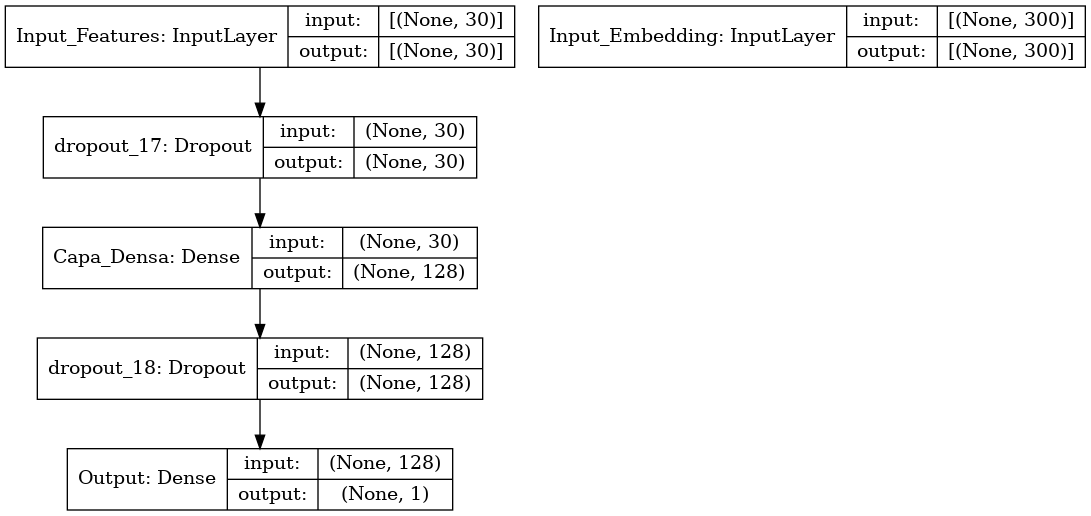

In [219]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [220]:
history = model.fit(x = [embedding_train,features_train],
                    y = target_train,
                    validation_data = ([embedding_test,features_test],target_test),
                    epochs=200,
                    batch_size=32,verbose=1)

Epoch 1/200
366/366 [==============================] - 1s 3ms/step - loss: 0.0485 - mae: 0.1783 - val_loss: 0.0444 - val_mae: 0.1697
Epoch 2/200
366/366 [==============================] - 1s 2ms/step - loss: 0.0448 - mae: 0.1704 - val_loss: 0.0420 - val_mae: 0.1641
Epoch 3/200
366/366 [==============================] - 1s 2ms/step - loss: 0.0438 - mae: 0.1687 - val_loss: 0.0407 - val_mae: 0.1616
Epoch 4/200
366/366 [==============================] - 1s 2ms/step - loss: 0.0428 - mae: 0.1665 - val_loss: 0.0392 - val_mae: 0.1579
Epoch 5/200
366/366 [==============================] - 1s 2ms/step - loss: 0.0414 - mae: 0.1630 - val_loss: 0.0390 - val_mae: 0.1589
Epoch 6/200
366/366 [==============================] - 1s 2ms/step - loss: 0.0409 - mae: 0.1622 - val_loss: 0.0378 - val_mae: 0.1548
Epoch 7/200
366/366 [==============================] - 1s 2ms/step - loss: 0.0403 - mae: 0.1607 - val_loss: 0.0369 - val_mae: 0.1520
Epoch 8/200
366/366 [==============================] - 1s 2ms/step - 

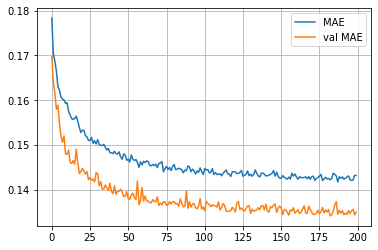

In [221]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

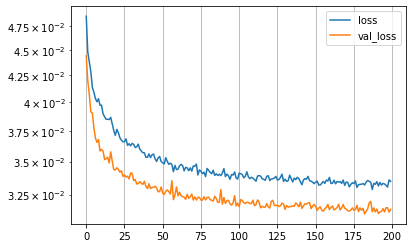

In [222]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [223]:
y_pred = model.predict([embedding_train,features_train])
y_true = target_train
y_pred.shape

(11681, 1)

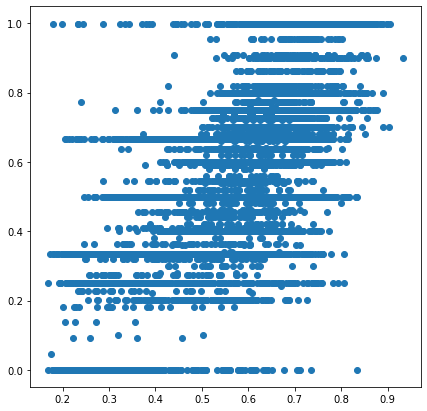

In [224]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [225]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.70666318],
       [0.70666318, 1.        ]])

In [226]:
y_pred = model.predict([embedding_test,features_test])
y_true = target_test
y_pred.shape

(1297, 1)

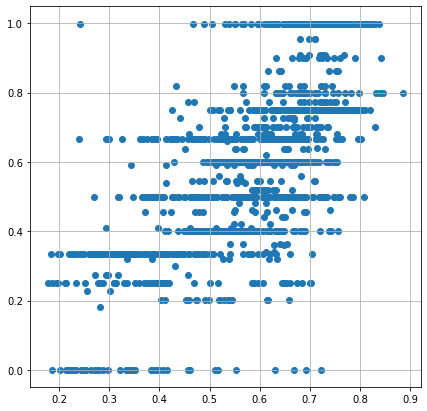

In [227]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [228]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.67304615],
       [0.67304615, 1.        ]])

## Segundo Modelo

In [229]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features_norm.shape[1]-2,),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
#x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x1)
x = Dense(128,activation='elu',name='Capa_Densa')(x)
#x = Dropout(0.4)(x)
#x = Dense(64,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='sigmoid',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 300)          0           Input_Embedding[0][0]            
__________________________________________________________________________________________________
Capa_Densa (Dense)              (None, 128)          38528       dropout_19[0][0]                 
__________________________________________________________________________________________________
dropout_20 (Dropout)            (None, 128)          0           Capa_Densa[0][0]                 
___________________________________________________________________________________________

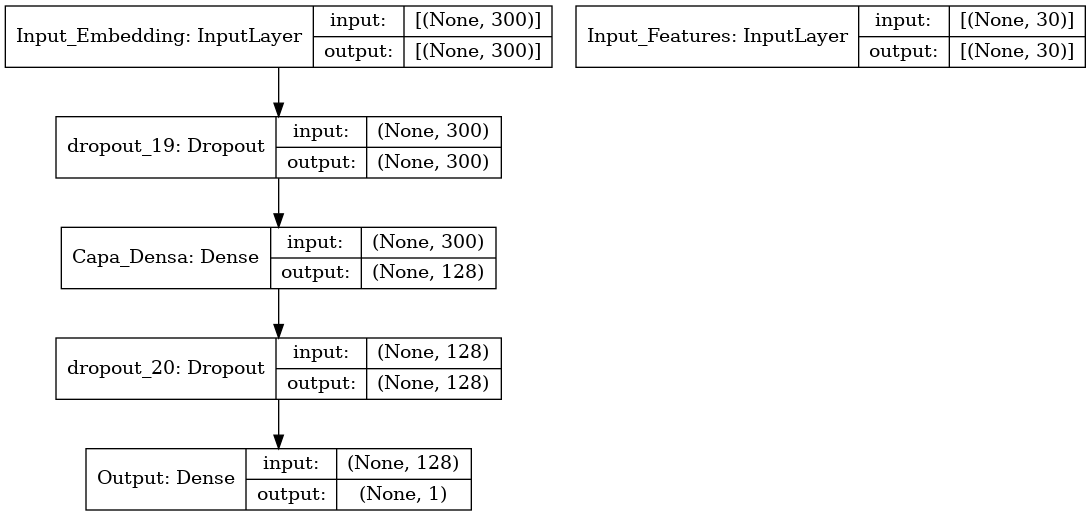

In [230]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [240]:
history = model.fit(x = [embedding_train,features_train],
                    y = target_train,
                    validation_data = ([embedding_test,features_test],target_test),
                    epochs=100,
                    batch_size=32,verbose=1)

Epoch 1/100
366/366 [==============================] - 1s 3ms/step - loss: 0.0347 - mae: 0.1457 - val_loss: 0.0331 - val_mae: 0.1416
Epoch 2/100
366/366 [==============================] - 1s 3ms/step - loss: 0.0348 - mae: 0.1458 - val_loss: 0.0324 - val_mae: 0.1406
Epoch 3/100
366/366 [==============================] - 1s 3ms/step - loss: 0.0345 - mae: 0.1455 - val_loss: 0.0324 - val_mae: 0.1408
Epoch 4/100
366/366 [==============================] - 1s 3ms/step - loss: 0.0353 - mae: 0.1475 - val_loss: 0.0330 - val_mae: 0.1418
Epoch 5/100
366/366 [==============================] - 1s 3ms/step - loss: 0.0347 - mae: 0.1465 - val_loss: 0.0325 - val_mae: 0.1406
Epoch 6/100
366/366 [==============================] - 1s 3ms/step - loss: 0.0349 - mae: 0.1463 - val_loss: 0.0342 - val_mae: 0.1440
Epoch 7/100
366/366 [==============================] - 1s 3ms/step - loss: 0.0349 - mae: 0.1460 - val_loss: 0.0337 - val_mae: 0.1430
Epoch 8/100
366/366 [==============================] - 1s 3ms/step - 

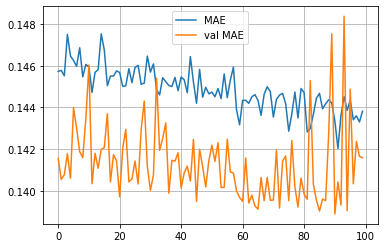

In [241]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

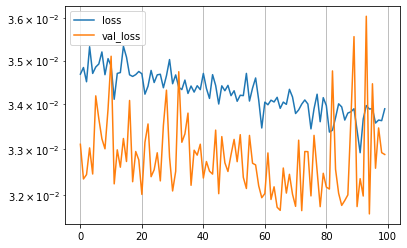

In [242]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [243]:
y_pred = model.predict([embedding_train,features_train])
y_true = target_train
y_pred.shape

(11681, 1)

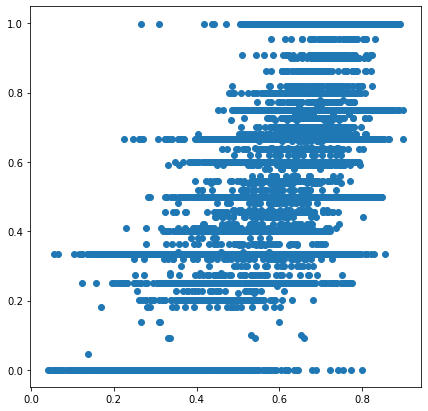

In [244]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [245]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.70799619],
       [0.70799619, 1.        ]])

In [246]:
y_pred = model.predict([embedding_test,features_test])
y_true = target_test
y_pred.shape

(1297, 1)

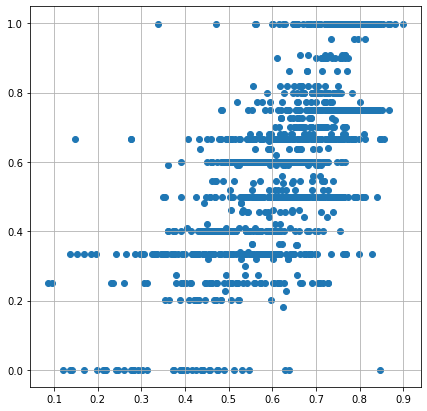

In [247]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [248]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.67043765],
       [0.67043765, 1.        ]])

## Tercer Modelo 

In [289]:
# Build the model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Input,Concatenate
from tensorflow.keras.layers import Embedding

embedding_vector_length = 300

x1 = Input(shape =(embedding_vector_length),name='Input_Embedding')
x2 = Input(shape =(features_norm.shape[1]-2,),name='Input_Features')

#x = Bidirectional(LSTM(50, dropout=0.2, recurrent_dropout=0.2),name='LSTM')(x1)
x = Concatenate(name='Concatenar')([x1,x2])
x = Dropout(0.2)(x)
x = Dense(128,activation='elu',name='Capa_Densa')(x)
#x = Dropout(0.4)(x)
#x = Dense(64,activation='relu',name='Capa_Densa_2')(x)
x = Dropout(0.2)(x)
x = Dense(1,activation='sigmoid',name='Output')(x)

model =  Model(inputs=[x1,x2],outputs=x)

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.summary()

Model: "model_14"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Embedding (InputLayer)    [(None, 300)]        0                                            
__________________________________________________________________________________________________
Input_Features (InputLayer)     [(None, 30)]         0                                            
__________________________________________________________________________________________________
Concatenar (Concatenate)        (None, 330)          0           Input_Embedding[0][0]            
                                                                 Input_Features[0][0]             
__________________________________________________________________________________________________
dropout_25 (Dropout)            (None, 330)          0           Concatenar[0][0]          

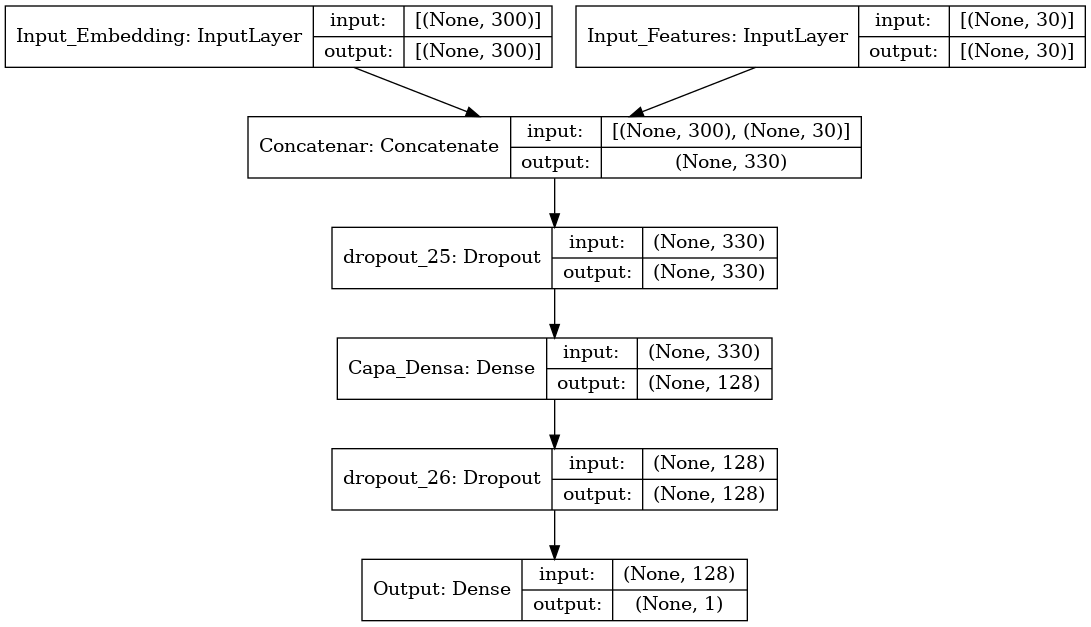

In [290]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

In [291]:
history = model.fit(x = [embedding_train,features_train],
                    y = target_train,
                    validation_data = ([embedding_test,features_test],target_test),
                    epochs=200,
                    batch_size=32,verbose=1)

Epoch 1/200
366/366 [==============================] - 2s 3ms/step - loss: 0.0408 - mae: 0.1593 - val_loss: 0.0382 - val_mae: 0.1498
Epoch 2/200
366/366 [==============================] - 1s 3ms/step - loss: 0.0363 - mae: 0.1505 - val_loss: 0.0339 - val_mae: 0.1433
Epoch 3/200
366/366 [==============================] - 1s 3ms/step - loss: 0.0336 - mae: 0.1442 - val_loss: 0.0319 - val_mae: 0.1383
Epoch 4/200
366/366 [==============================] - 1s 3ms/step - loss: 0.0320 - mae: 0.1409 - val_loss: 0.0311 - val_mae: 0.1362
Epoch 5/200
366/366 [==============================] - 1s 3ms/step - loss: 0.0299 - mae: 0.1360 - val_loss: 0.0266 - val_mae: 0.1260
Epoch 6/200
366/366 [==============================] - 1s 3ms/step - loss: 0.0296 - mae: 0.1357 - val_loss: 0.0256 - val_mae: 0.1223
Epoch 7/200
366/366 [==============================] - 1s 3ms/step - loss: 0.0287 - mae: 0.1336 - val_loss: 0.0251 - val_mae: 0.1212
Epoch 8/200
366/366 [==============================] - 1s 3ms/step - 

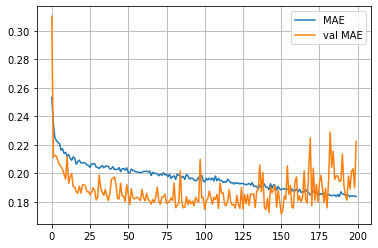

In [281]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='val MAE')
plt.legend()
plt.grid()
plt.show()

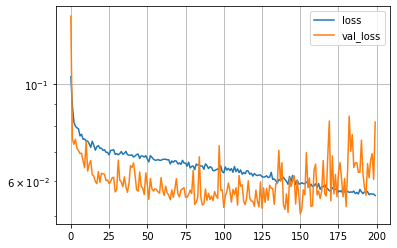

In [282]:
plt.semilogy(history.history['loss'], label='loss')
plt.semilogy(history.history['val_loss'], label='val_loss')
plt.legend()
plt.grid()
plt.show()

In [283]:
y_pred = model.predict([embedding_train,features_train])
y_true = target_train
y_pred.shape

(11681, 1)

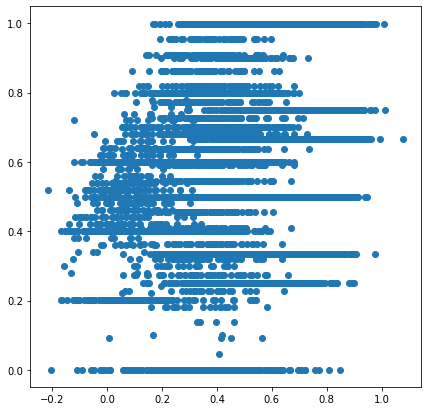

In [284]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.show()

In [285]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.38374104],
       [0.38374104, 1.        ]])

In [286]:
y_pred = model.predict([embedding_test,features_test])
y_true = target_test
y_pred.shape

(1297, 1)

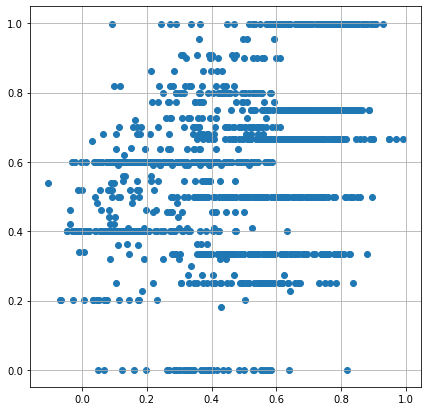

In [287]:
plt.figure(figsize=(7,7))
plt.scatter(y_pred,y_true)
plt.grid()
plt.show()

In [288]:
np.corrcoef(y_true,y_pred.reshape(-1))

array([[1.        , 0.38287346],
       [0.38287346, 1.        ]])